<a href="https://colab.research.google.com/github/Jyotiraditya7/Time-series/blob/main/TDS_of_jalangi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # Plotly for interactive plots
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX model for time series forecasting
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal decomposition for trend, seasonal, and residual components
import statsmodels.api as sm
from pylab import rcParams
import math
import statsmodels.api as sms
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/new jalangi.csv"
df = pd.read_csv(path)
df1=df
#df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') # Changed format to day/month/year
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.set_index(['Date'])
dfxg = df
df = df[['Total Dissolved Solids(TDS)']]
df.head()
print('Shape of the data= ', df.shape)
print('Column datatypes= \n',df.dtypes)

Shape of the data=  (164, 1)
Column datatypes= 
 Total Dissolved Solids(TDS)    float64
dtype: object


In [4]:
df.head()

Total Dissolved Solids(TDS)
Date                                   
2024-05-06                        242.0
2024-04-08                        362.0
2024-03-27                        324.0
2024-02-19                        322.0
2024-01-30                        182.0

In [5]:
df.tail()

Total Dissolved Solids(TDS)
Date                                   
2011-01-07                          NaN
2010-10-06                          NaN
2010-07-26                          NaN
2010-04-22                        256.0
2010-01-28                          NaN

In [6]:
df = df.sort_values(by='Date')

In [7]:
df.head()

Total Dissolved Solids(TDS)
Date                                   
2010-01-28                          NaN
2010-04-22                        256.0
2010-07-26                          NaN
2010-10-06                          NaN
2011-01-07                          NaN

In [8]:
df['Total Dissolved Solids(TDS)'].describe()

count    160.000000
mean     259.581250
std       82.260552
min       86.000000
25%      201.500000
50%      246.000000
75%      320.000000
max      452.000000
Name: Total Dissolved Solids(TDS), dtype: float64

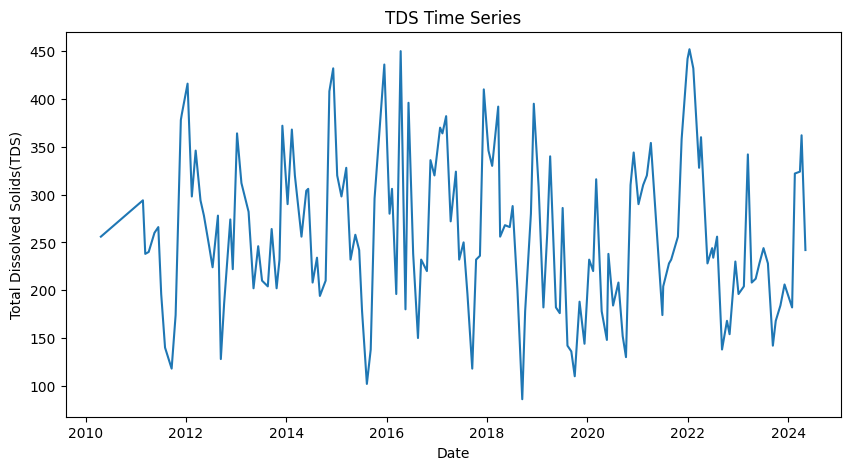

In [9]:
plt.figure(figsize=(10,5));
sns.lineplot(data=df,x=df.index,y=df['Total Dissolved Solids(TDS)']);
plt.title('TDS Time Series');

In [10]:
df['rollMean']  = df['Total Dissolved Solids(TDS)'].rolling(window=12).mean()
df['rollStd']  = df['Total Dissolved Solids(TDS)'].rolling(window=12).std()

<Axes: xlabel='Date', ylabel='Total Dissolved Solids(TDS)'>

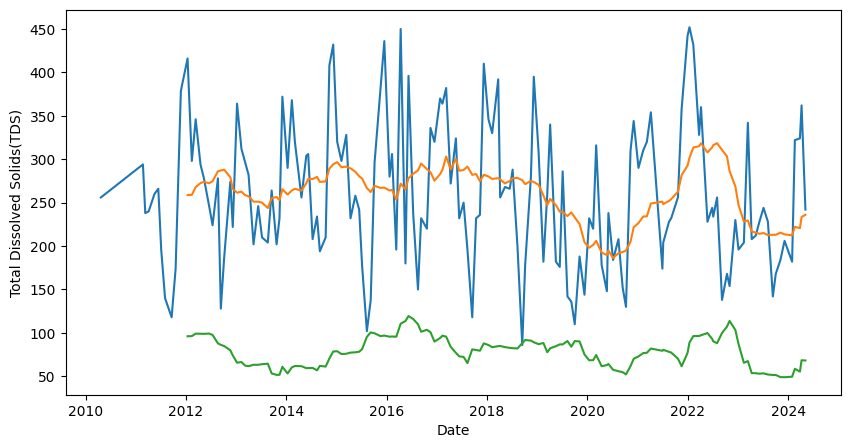

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df['Total Dissolved Solids(TDS)'])
sns.lineplot(data=df,x=df.index,y=df.rollMean)
sns.lineplot(data=df,x=df.index,y=df.rollStd)

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adfTest = adfuller(df['Total Dissolved Solids(TDS)'].dropna(),autolag='AIC',)

In [14]:
adfTest

(np.float64(-2.5463107627463084),
 np.float64(0.10460904040047947),
 13,
 146,
 {'1%': np.float64(-3.4759527332353084),
  '5%': np.float64(-2.881548071241103),
  '10%': np.float64(-2.577438765246763)},
 np.float64(1646.5382058628995))

In [15]:
stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
stats

Test Statistic                  -2.546311
p-value                          0.104609
#lags used                      13.000000
number of observations used    146.000000
dtype: float64

In [16]:
for key, values in adfTest[4].items():
    print('criticality',key,":",values)


criticality 1% : -3.4759527332353084
criticality 5% : -2.881548071241103
criticality 10% : -2.577438765246763


In [17]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()

    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats)

    for key, values in adfTest[4].items():
        print('criticality',key,":",values)

    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd')

In [18]:
air_df = df[['Total Dissolved Solids(TDS)']]
air_df.head()

Total Dissolved Solids(TDS)
Date                                   
2010-01-28                          NaN
2010-04-22                        256.0
2010-07-26                          NaN
2010-10-06                          NaN
2011-01-07                          NaN

In [19]:
air_df['shift'] = air_df['Total Dissolved Solids(TDS)'].shift()
air_df['shiftDiff'] = air_df['Total Dissolved Solids(TDS)']- air_df['shift']
air_df.head()


Total Dissolved Solids(TDS)  shift  shiftDiff
Date                                                     
2010-01-28                          NaN    NaN        NaN
2010-04-22                        256.0    NaN        NaN
2010-07-26                          NaN  256.0        NaN
2010-10-06                          NaN    NaN        NaN
2011-01-07                          NaN    NaN        NaN

Test Statistic                  -5.047537
p-value                          0.000018
#lags used                      12.000000
number of observations used    145.000000
dtype: float64
criticality 1% : -3.476273058920005
criticality 5% : -2.881687616548444
criticality 10% : -2.5775132580261593


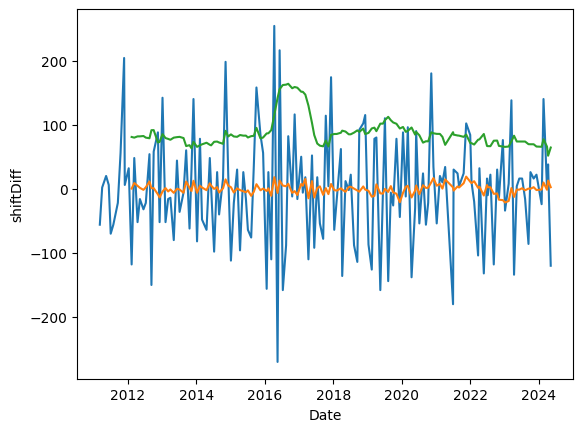

In [20]:
test_stationarity(air_df.dropna(),'shiftDiff')

In [21]:
log_df = df[['Total Dissolved Solids(TDS)']]
log_df['log'] = np.log(log_df['Total Dissolved Solids(TDS)'])
log_df.head()


Total Dissolved Solids(TDS)       log
Date                                             
2010-01-28                          NaN       NaN
2010-04-22                        256.0  5.545177
2010-07-26                          NaN       NaN
2010-10-06                          NaN       NaN
2011-01-07                          NaN       NaN

Test Statistic                  -2.358713
p-value                          0.153730
#lags used                      13.000000
number of observations used    146.000000
dtype: float64
criticality 1% : -3.4759527332353084
criticality 5% : -2.881548071241103
criticality 10% : -2.577438765246763


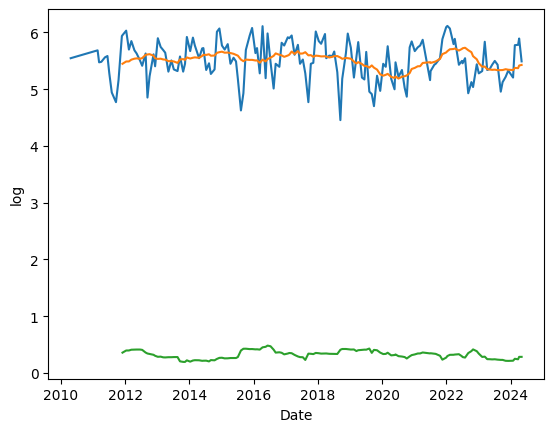

In [22]:
test_stationarity(log_df.dropna(),'log')

In [23]:
sqrt_df = df[['Total Dissolved Solids(TDS)']]
sqrt_df['sqrt'] = np.sqrt(df['Total Dissolved Solids(TDS)'])
sqrt_df.head()

Total Dissolved Solids(TDS)  sqrt
Date                                         
2010-01-28                          NaN   NaN
2010-04-22                        256.0  16.0
2010-07-26                          NaN   NaN
2010-10-06                          NaN   NaN
2011-01-07                          NaN   NaN

Test Statistic                  -2.451369
p-value                          0.127759
#lags used                      13.000000
number of observations used    146.000000
dtype: float64
criticality 1% : -3.4759527332353084
criticality 5% : -2.881548071241103
criticality 10% : -2.577438765246763


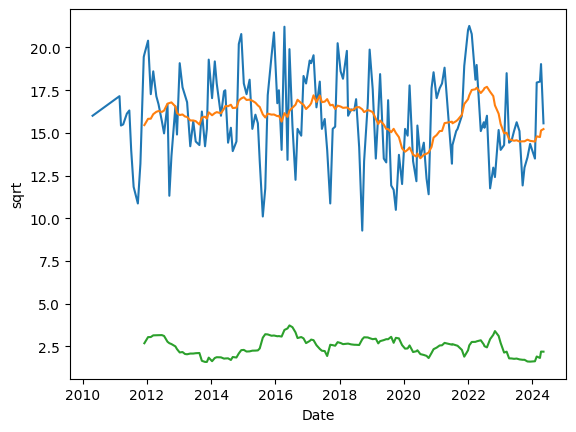

In [24]:
test_stationarity(sqrt_df.dropna(),'sqrt')

In [25]:
cbrt_df = df[['Total Dissolved Solids(TDS)']]
cbrt_df['cbrt'] = np.cbrt(cbrt_df['Total Dissolved Solids(TDS)'])
cbrt_df.head()


Total Dissolved Solids(TDS)      cbrt
Date                                             
2010-01-28                          NaN       NaN
2010-04-22                        256.0  6.349604
2010-07-26                          NaN       NaN
2010-10-06                          NaN       NaN
2011-01-07                          NaN       NaN

Test Statistic                  -2.419615
p-value                          0.136277
#lags used                      13.000000
number of observations used    146.000000
dtype: float64
criticality 1% : -3.4759527332353084
criticality 5% : -2.881548071241103
criticality 10% : -2.577438765246763


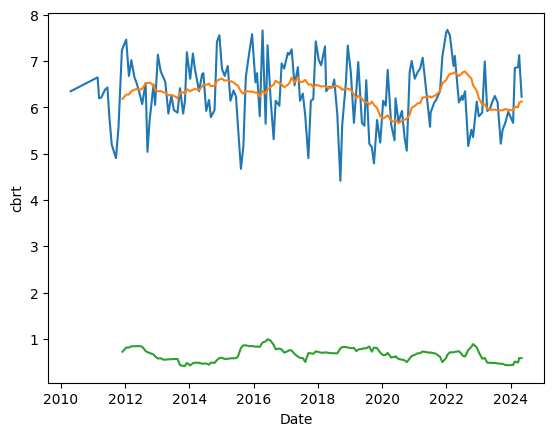

In [26]:
test_stationarity(cbrt_df.dropna(),'cbrt')

In [27]:
log_df2 = log_df[['Total Dissolved Solids(TDS)','log']]
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2['logShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()

Total Dissolved Solids(TDS)       log  log_sqrt  logShiftDiff
Date                                                                     
2010-01-28                          NaN       NaN       NaN           NaN
2010-04-22                        256.0  5.545177   2.35482           NaN
2010-07-26                          NaN       NaN       NaN           NaN
2010-10-06                          NaN       NaN       NaN           NaN
2011-01-07                          NaN       NaN       NaN           NaN

Test Statistic                  -5.272729
p-value                          0.000006
#lags used                      12.000000
number of observations used    145.000000
dtype: float64
criticality 1% : -3.476273058920005
criticality 5% : -2.881687616548444
criticality 10% : -2.5775132580261593


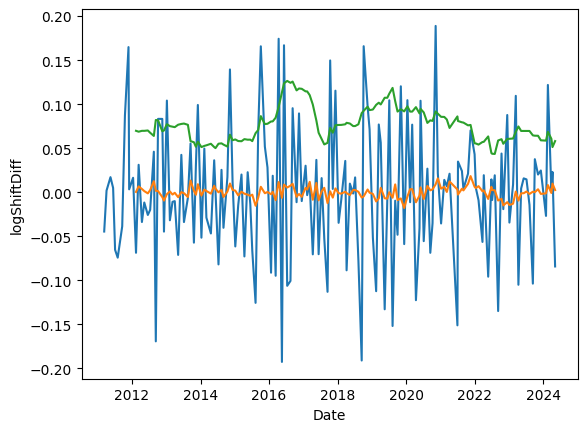

In [28]:
test_stationarity(log_df2.dropna(),'logShiftDiff')

In [29]:
log_shift = df[['Total Dissolved Solids(TDS)']].copy(deep=True)
log_shift['log'] = np.log(log_shift['Total Dissolved Solids(TDS)'])
log_shift['logShift'] = log_shift['log'].shift()
log_shift['logShiftDiff'] = log_shift['log'] - log_shift['logShift']
log_shift.head()


Total Dissolved Solids(TDS)       log  logShift  logShiftDiff
Date                                                                     
2010-01-28                          NaN       NaN       NaN           NaN
2010-04-22                        256.0  5.545177       NaN           NaN
2010-07-26                          NaN       NaN  5.545177           NaN
2010-10-06                          NaN       NaN       NaN           NaN
2011-01-07                          NaN       NaN       NaN           NaN

Test Statistic                  -5.245901
p-value                          0.000007
#lags used                      12.000000
number of observations used    145.000000
dtype: float64
criticality 1% : -3.476273058920005
criticality 5% : -2.881687616548444
criticality 10% : -2.5775132580261593


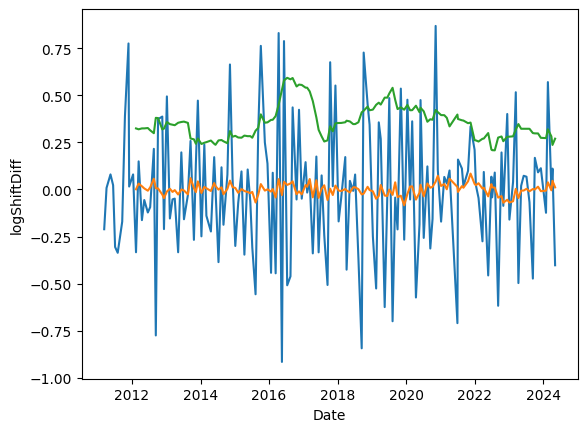

In [30]:
test_stationarity(log_shift.dropna(),'logShiftDiff')


In [31]:
airP = df[['Total Dissolved Solids(TDS)']].copy(deep=True)
airP['firstDiff'] = airP['Total Dissolved Solids(TDS)'].diff()
airP['Diff12'] = airP['Total Dissolved Solids(TDS)'].diff(12)


In [32]:
airP.head()

Total Dissolved Solids(TDS)  firstDiff  Diff12
Date                                                      
2010-01-28                          NaN        NaN     NaN
2010-04-22                        256.0        NaN     NaN
2010-07-26                          NaN        NaN     NaN
2010-10-06                          NaN        NaN     NaN
2011-01-07                          NaN        NaN     NaN

Outlier

In [33]:
df['Total Dissolved Solids(TDS)']

Date
2010-01-28      NaN
2010-04-22    256.0
2010-07-26      NaN
2010-10-06      NaN
2011-01-07      NaN
              ...  
2024-01-30    182.0
2024-02-19    322.0
2024-03-27    324.0
2024-04-08    362.0
2024-05-06    242.0
Name: Total Dissolved Solids(TDS), Length: 164, dtype: float64

In [34]:
nan_count = df['Total Dissolved Solids(TDS)'].isna().sum()
print(f"Number of NaN values: {nan_count}")

Number of NaN values: 4


In [35]:
df['Total Dissolved Solids(TDS)']=df['Total Dissolved Solids(TDS)'].fillna(0)

In [36]:
zero_count = (df['Total Dissolved Solids(TDS)'] == 0.0).sum()
print(f"Number of 0.0 values: {zero_count}")



Number of 0.0 values: 4


In [37]:
median_value = df.loc[df['Total Dissolved Solids(TDS)'] != 0.0, 'Total Dissolved Solids(TDS)'].median()
df['Total Dissolved Solids(TDS)'] = df['Total Dissolved Solids(TDS)'].replace(0.0, median_value)


In [38]:
zero_count = (df['Total Dissolved Solids(TDS)'] == 0.0).sum()
print(f"Number of 0.0 values: {zero_count}")

Number of 0.0 values: 0


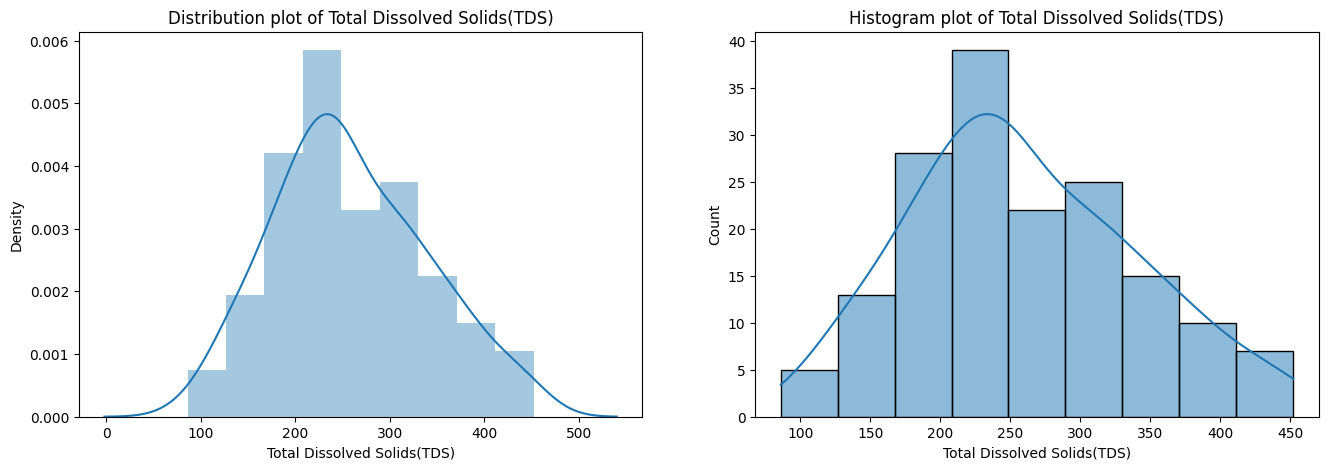

In [39]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title('Distribution plot of Total Dissolved Solids(TDS)')
sns.distplot(df['Total Dissolved Solids(TDS)'])
plt.subplot(1,2,2)
sns.histplot(df['Total Dissolved Solids(TDS)'], kde=True)
plt.title('Histogram plot of Total Dissolved Solids(TDS)')
plt.show()

We know that this is left skewed data
IQR is applied on either left or right-skewed data.

In [40]:
df['Total Dissolved Solids(TDS)']

Date
2010-01-28    246.0
2010-04-22    256.0
2010-07-26    246.0
2010-10-06    246.0
2011-01-07    246.0
              ...  
2024-01-30    182.0
2024-02-19    322.0
2024-03-27    324.0
2024-04-08    362.0
2024-05-06    242.0
Name: Total Dissolved Solids(TDS), Length: 164, dtype: float64

In [41]:
df['Total Dissolved Solids(TDS)'].describe()

count    164.000000
mean     259.250000
std       81.272123
min       86.000000
25%      202.000000
50%      246.000000
75%      317.000000
max      452.000000
Name: Total Dissolved Solids(TDS), dtype: float64

<Axes: >

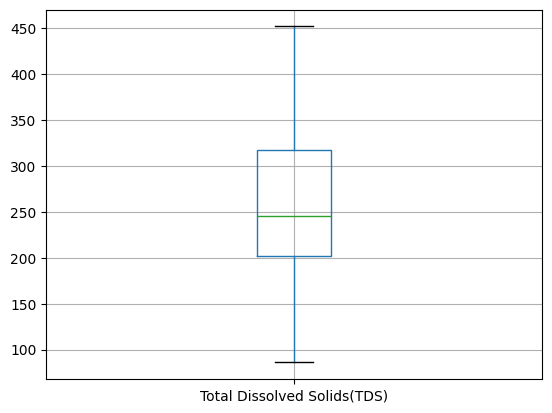

In [42]:
df.boxplot(column=['Total Dissolved Solids(TDS)'])

<Axes: ylabel='Total Dissolved Solids(TDS)'>

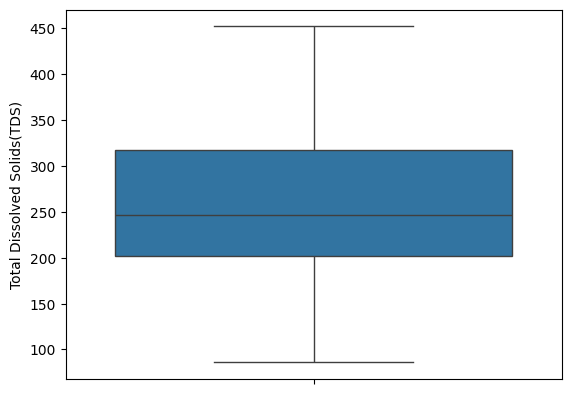

In [43]:
sns.boxplot(df['Total Dissolved Solids(TDS)'])

In [44]:
percentile25 = df['Total Dissolved Solids(TDS)'].quantile(0.25)
percentile75 = df['Total Dissolved Solids(TDS)'].quantile(0.75)

In [45]:
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)

75th quartile:  317.0
25th quartile:  202.0


In [46]:
iqr = percentile75 - percentile25
print ("IQR: ",iqr)

IQR:  115.0


In [47]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 489.5
Lower limit 29.5


In [48]:
df[df['Total Dissolved Solids(TDS)'] > upper_limit]

Empty DataFrame
Columns: [Total Dissolved Solids(TDS), rollMean, rollStd]
Index: []

In [49]:
df[df['Total Dissolved Solids(TDS)'] < lower_limit]

Empty DataFrame
Columns: [Total Dissolved Solids(TDS), rollMean, rollStd]
Index: []

therefore outliers present

In [50]:
df['Total Dissolved Solids(TDS)'] = np.where(df['Total Dissolved Solids(TDS)'] > upper_limit, upper_limit,
            np.where(df['Total Dissolved Solids(TDS)'] < lower_limit, lower_limit, df['Total Dissolved Solids(TDS)']))

In [51]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [52]:
airP = df[['Total Dissolved Solids(TDS)']].copy(deep=True)

In [53]:
train = airP[:round(len(airP)*75/100)]
test = airP[round(len(airP)*75/100):]
test.head()

Total Dissolved Solids(TDS)
Date                                   
2020-12-03                        344.0
2021-01-07                        290.0
2021-02-10                        310.0
2021-03-09                        320.0
2021-04-07                        354.0

In [54]:
test.index[0]

Timestamp('2020-12-03 00:00:00')

In [55]:
test.index[-1]

Timestamp('2024-05-06 00:00:00')

# **Arima**

In [56]:
train['Total Dissolved Solids(TDS)']

Date
2010-01-28    246.0
2010-04-22    256.0
2010-07-26    246.0
2010-10-06    246.0
2011-01-07    246.0
              ...  
2020-07-06    184.0
2020-08-14    208.0
2020-09-14    152.0
2020-10-08    130.0
2020-11-10    310.0
Name: Total Dissolved Solids(TDS), Length: 123, dtype: float64

Train performance

+---------+---------+---------+----------+----------+
|         |     MSE |    RMSE |     MAPE |      R^2 |
+=========+=========+=========+==========+==========+
| Metrics | 4349.96 | 65.9542 | 0.231213 | 0.338838 |
+---------+---------+---------+----------+----------+


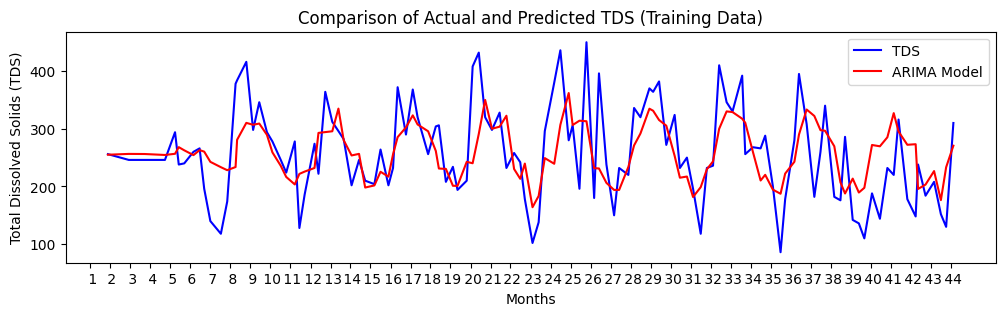

In [57]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
from tabulate import tabulate

# Train ARIMA model on training data
model = ARIMA(train['Total Dissolved Solids(TDS)'], order=(4,0,4))#4,1,3
model_fit = model.fit()

# Generate predictions on training data
train_prediction = model_fit.predict(start=1, end=len(train) - 1)
train_prediction.index = train.index[1:]  # Align predictions with training index
arima_pred = train_prediction
# Calculate metrics
mse = mean_squared_error(train['Total Dissolved Solids(TDS)'][1:], train_prediction)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(train['Total Dissolved Solids(TDS)'][1:], train_prediction)
r2 = r2_score(train['Total Dissolved Solids(TDS)'][1:], train_prediction)

# Display metrics in a table
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "R^2": [r2]
}

metrics_df = pd.DataFrame(metrics, index=["Metrics"])
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

# Plot actual and predicted values
plt.figure(figsize=(12,3))
plt.plot(train.index[1:], train['Total Dissolved Solids(TDS)'][1:], label='TDS', color='blue')
plt.plot(train.index[1:], train_prediction, label='ARIMA Model', color='red')
plt.xlabel('Months')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS (Training Data)')
plt.legend()

# Format x-axis with months in intervals of 3
xticks = pd.date_range(start=train.index.min(), end=train.index.max(), freq='3MS')
plt.xticks(ticks=xticks, labels=[f" {i+1}" for i in range(len(xticks))])
plt.show()


Test performance

In [60]:
!pip uninstall pmdarima -y
!pip install pmdarima

Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)


In [192]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

# Fit Auto ARIMA model
auto_model = auto_arima(train['Total Dissolved Solids(TDS)'], seasonal=False, stepwise=True, trace=True)

# Extract best order
best_order = auto_model.order
print(f"Selected ARIMA order: {best_order}")

# Train ARIMA model with the best order
model = ARIMA(train['Total Dissolved Solids(TDS)'], order=best_order)
model_fit = model.fit()

# Generate predictions
prediction = model_fit.predict(start=train.shape[0], end=train.shape[0] + len(test) - 1)
prediction.index = test.index

# Calculate initial R² score
r2 = r2_score(test['Total Dissolved Solids(TDS)'], prediction)
print(f"Initial R² Score: {r2}")

# Keep running until R² is positive
while r2 < 0:
    best_order = (best_order[0] + 1, best_order[1], best_order[2] + 1)  # Adjust order
    model = ARIMA(train['Total Dissolved Solids(TDS)'], order=best_order)
    model_fit = model.fit()
    prediction = model_fit.predict(start=train.shape[0], end=train.shape[0] + len(test) - 1)
    prediction.index = test.index
    r2 = r2_score(test['Total Dissolved Solids(TDS)'], prediction)
    print(f"Trying ARIMA{best_order}, New R²: {r2}")

# Plot test values and predictions
plt.figure(figsize=(5, 3))
plt.plot(test.index, test['Total Dissolved Solids(TDS)'], label='Actual TDS', color='blue')
plt.plot(test.index, prediction, label='ARIMA Predictions', color='red')
plt.xlabel('Months')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title(f'ARIMA Model (R²={r2:.4f})')
plt.legend()

# Format x-axis with months in intervals of 3
xticks = pd.date_range(start=test.index.min(), end=test.index.max(), freq='3MS')
plt.xticks(ticks=xticks, labels=[f" {i+1}" for i in range(len(xticks))])
plt.show()


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Calculate metrics
mse = mean_squared_error(test['Total Dissolved Solids(TDS)'], prediction)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test['Total Dissolved Solids(TDS)'], prediction)
r2 = r2_score(test['Total Dissolved Solids(TDS)'], prediction)

# Handle zero values for MAPE
non_zero_indices = test['Total Dissolved Solids(TDS)'] != 0
y_test_non_zero = test['Total Dissolved Solids(TDS)'][non_zero_indices]
predictions_non_zero = prediction[non_zero_indices]

if len(y_test_non_zero) == len(predictions_non_zero):
    mape_non_zero = np.mean(np.abs((y_test_non_zero - predictions_non_zero) / y_test_non_zero)) * 100
else:
    mape_non_zero = "Error: Non-zero lengths mismatch"

# Display metrics in tabular format
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "MAPE (excl. zeros)": [mape_non_zero],
    "R^2": [r2]
}
metrics_df = pd.DataFrame(metrics, index=["Metrics"])
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Total Dissolved Solids(TDS)'],prediction))

# Calculate Relative RMSE
mean_actual = test['Total Dissolved Solids(TDS)'].mean()
relative_rmse = rmse / mean_actual

# Calculate Normalized RMSE
range_actual = test['Total Dissolved Solids(TDS)'].max() - test['Total Dissolved Solids(TDS)'].min()
normalized_rmse = rmse / range_actual

# Display the results
results = {
    'Metric': ['RMSE', 'Relative RMSE', 'Normalized RMSE'],
    'Value': [rmse, relative_rmse, normalized_rmse]
}

results_df = pd.DataFrame(results)
print(results_df)

In [ ]:
# Plot the forecast
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
plt.figure(figsize=(5,3))
plt.plot(range(1, forecast_steps + 1), forecast, label='Forecasted Values', color='green', marker='o')
plt.xlabel('Months')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Forecast for Next 12 Months')
plt.xticks(range(1, forecast_steps + 1), [f" {i}" for i in range(1, forecast_steps + 1)])
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# **Sarimax**

In [ ]:
model = SARIMAX(train['Total Dissolved Solids(TDS)'],order=(1,1,1),seasonal_order=(1,1,1,12))
start_index = airP.index.get_loc(test.index[0])
end_index = airP.index.get_loc(test.index[-1])
model_fit = model.fit()
prediction = model_fit.predict(start=start_index,end=end_index)
prediction.index = test.index
airP['sarimaxPred'] = prediction

In [ ]:
#og
model = SARIMAX(train['Total Dissolved Solids(TDS)'],order=(4,1,3),seasonal_order=(4,1,3,12))
start_index = airP.index.get_loc(test.index[0])
end_index = airP.index.get_loc(test.index[-1])
model_fit = model.fit()
prediction = model_fit.predict(start=start_index,end=end_index)
prediction.index = test.index
airP['sarimaxPred'] = prediction

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
from tabulate import tabulate

# Train SARIMAX model on training data
model = SARIMAX(train['Total Dissolved Solids(TDS)'], order=(2,0,1), seasonal_order=(2,0,1, 12))# 2,0,1   2,0,1,12
model_fit = model.fit(disp=False)

# Generate predictions on training data
train_prediction = model_fit.predict(start=1, end=len(train) - 1)
train_prediction.index = train.index[1:]  # Align predictions with training index

# Calculate metrics
mse = mean_squared_error(train['Total Dissolved Solids(TDS)'][1:], train_prediction)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(train['Total Dissolved Solids(TDS)'][1:], train_prediction)
r2 = r2_score(train['Total Dissolved Solids(TDS)'][1:], train_prediction)

# Display metrics in a table
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "R^2": [r2]
}

metrics_df = pd.DataFrame(metrics, index=["Metrics"])
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

# Plot actual and predicted values
plt.figure(figsize=(13, 4))
plt.plot(train.index[1:], train['Total Dissolved Solids(TDS)'][1:], label='TDS', color='blue')
plt.plot(train.index[1:], train_prediction, label='SARIMAX Model', color='red')
plt.plot(train.index[1:], arima_pred, label='ARIMA Model', color='green')
plt.xlabel('Months')
plt.ylabel('TDS')
plt.title('Descriptive graph of TDS Vs Model at point 3')
plt.legend()

# Format x-axis to show months as 1, 4, 7, etc.
xticks = pd.date_range(start=train.index.min(), end=train.index.max(), freq='3MS')
plt.xticks(ticks=xticks, labels=[f" {i+1}" for i in range(len(xticks))])
plt.show()

In [ ]:
# Generate predictions on test data
start_index = train.shape[0]
end_index = train.shape[0] + len(test) - 1
test_prediction = model_fit.predict(start=start_index, end=end_index)
test_prediction.index = test.index  # Align predictions with test index

# Calculate metrics for test data
mse = mean_squared_error(test['Total Dissolved Solids(TDS)'], test_prediction)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test['Total Dissolved Solids(TDS)'], test_prediction)
r2 = r2_score(test['Total Dissolved Solids(TDS)'], test_prediction)

# Display metrics in a table
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "R^2": [r2]
}

metrics_df = pd.DataFrame(metrics, index=["Metrics"])
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

# Plot actual and predicted values for test data
plt.figure(figsize=(7, 4))
plt.plot(test.index, test['Total Dissolved Solids(TDS)'], label='TDS', color='blue')
plt.plot(test.index, test_prediction, label='SARIMAX Model', color='red')
plt.xlabel('Months')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS (Test Data)')
plt.legend()

# Format x-axis to show months as 1, 4, 7, etc.
xticks = pd.date_range(start=test.index.min(), end=test.index.max(), freq='3MS')
plt.xticks(ticks=xticks, labels=[f" {i+1}" for i in range(len(xticks))])
plt.show()



In [ ]:
rmse = np.sqrt(mean_squared_error(test['Total Dissolved Solids(TDS)'],test_prediction))

# Calculate Relative RMSE
mean_actual = test['Total Dissolved Solids(TDS)'].mean()
relative_rmse = rmse / mean_actual

# Calculate Normalized RMSE
range_actual = test['Total Dissolved Solids(TDS)'].max() - test['Total Dissolved Solids(TDS)'].min()
normalized_rmse = rmse / range_actual

# Display the results
results = {
    'Metric': ['RMSE', 'Relative RMSE', 'Normalized RMSE'],
    'Value': [rmse, relative_rmse, normalized_rmse]
}

results_df = pd.DataFrame(results)
print(results_df)

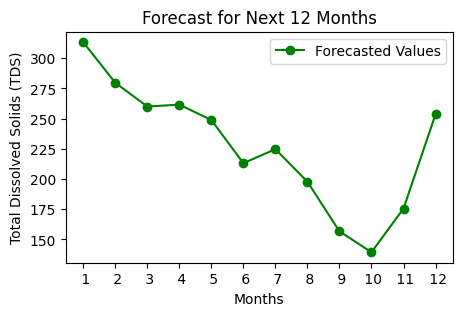

In [65]:
# Plot the forecast
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
plt.figure(figsize=(5,3))
plt.plot(range(1, forecast_steps + 1), forecast, label='Forecasted Values', color='green', marker='o')
plt.xlabel('Months')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Forecast for Next 12 Months')
plt.xticks(range(1, forecast_steps + 1), [f" {i}" for i in range(1, forecast_steps + 1)])
plt.legend()
plt.show()

backtest

In [66]:
path = "/content/drive/MyDrive/backtest jalangi.csv"
db = pd.read_csv(path)
db1=db
db['Date'] = pd.to_datetime(db['Date'], format='%d/%m/%Y') # Changed format to day/month/year
db = db.set_index(['Date'])
dbxg = db
db = db[['Total Dissolved Solids(TDS)']]
db.head()
print('Shape of the data= ', db.shape)
print('Column datatypes= \n',db.dtypes)

Shape of the data=  (177, 1)
Column datatypes= 
 Total Dissolved Solids(TDS)    float64
dtype: object


In [67]:
db = db.sort_values(by='Date')

In [68]:
db = db.tail(12)

In [69]:
db

Total Dissolved Solids(TDS)
Date                                   
2024-07-10                        228.0
2024-08-12                        230.0
2024-09-10                        142.0
2024-10-24                        162.0
2024-11-12                        220.0
2024-12-09                        232.0
2025-01-09                        178.0
2025-02-05                        222.0
2025-03-05                        248.0
2025-04-09                        310.0
2025-05-05                        212.0
2025-06-02                        220.0

In [70]:
percentile25 = db['Total Dissolved Solids(TDS)'].quantile(0.25)
percentile75 = db['Total Dissolved Solids(TDS)'].quantile(0.75)
print("75th quartile: ",percentile75)
print("25th quartile: ",percentile25)
iqr = percentile75 - percentile25
print ("IQR: ",iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)
db[db['Total Dissolved Solids(TDS)'] > upper_limit]
db[db['Total Dissolved Solids(TDS)'] < lower_limit]
db['Total Dissolved Solids(TDS)'] = np.where(db['Total Dissolved Solids(TDS)'] > upper_limit, upper_limit,
            np.where(db['Total Dissolved Solids(TDS)'] < lower_limit, lower_limit, db['Total Dissolved Solids(TDS)']))

75th quartile:  230.5
25th quartile:  203.5
IQR:  27.0
Upper limit 271.0
Lower limit 163.0


In [71]:
db

Total Dissolved Solids(TDS)
Date                                   
2024-07-10                        228.0
2024-08-12                        230.0
2024-09-10                        163.0
2024-10-24                        163.0
2024-11-12                        220.0
2024-12-09                        232.0
2025-01-09                        178.0
2025-02-05                        222.0
2025-03-05                        248.0
2025-04-09                        271.0
2025-05-05                        212.0
2025-06-02                        220.0

# **XGBOOST**

In [72]:
print(dfxg['Ammonia-N'].dtype)

object


<Axes: >

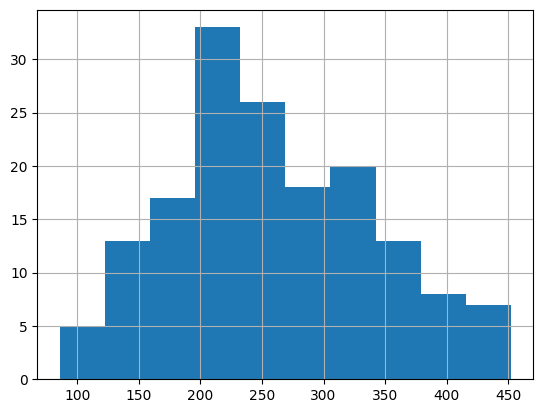

In [73]:
dfxg['Total Dissolved Solids(TDS)'].hist()

In [74]:
X = dfxg.drop('Total Dissolved Solids(TDS)',axis=1)
y = dfxg['Total Dissolved Solids(TDS)']

In [75]:
!pip install scikit-learn # Install scikit-learn if you haven't already
from sklearn.model_selection import train_test_split
!pip install xgboost # Install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [77]:
X_train.shape,X_test.shape

((123, 48), (41, 48))

In [78]:
xgbmodel = XGBRegressor()

In [79]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.fillna(0)  # Handle any NaN values that may arise

y_train = y_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.fillna(0)  # Handle any NaN values that may arise

X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test = X_test.fillna(0)  # Handle any NaN values that may arise

y_test = y_test.apply(pd.to_numeric, errors='coerce')
y_test = y_test.fillna(0)  # Handle any NaN values that may arise

In [80]:
X_train

Ammonia-N   BOD  Conductivity  Dissolved O2(DO)  Fecal Coliform  \
Date                                                                          
2021-08-17       0.10  3.25         302.1               1.4            1700   
2019-05-17       0.28  3.00         431.0               6.5          110000   
2017-03-09       0.00  2.35         576.0               7.2          140000   
2014-08-12       0.00  2.80         280.0               5.0           23000   
2011-09-19       0.00  3.20         234.0               5.6           11000   
...               ...   ...           ...               ...             ...   
2013-03-08       0.12  6.85         363.0               9.3           26000   
2012-11-19       0.23  3.25         390.0               6.7           50000   
2018-04-06       0.00  4.40         499.0               8.2            4000   
2012-08-21       0.00  1.55         211.0               4.8           17000   
2021-03-09       0.39  4.90         642.0               5.1           49000   

            Fecal Streptococci  Nitrate-N    pH  Temperature(Water)  \
Date                                                                  
2021-08-17               330.0       0.62  7.40                32.0   
2019-05-17                 0.0       0.47  8.16                 0.0   
2017-03-09                 0.0       0.08  7.85                 0.0   
2014-08-12                 0.0       1.02  8.01                 0.0   
2011-09-19                 0.0       0.79  7.00                 0.0   
...                        ...        ...   ...                 ...   
2013-03-08                 0.0       0.45  7.73                 0.0   
2012-11-19                 0.0       0.49  7.07                 0.0   
2018-04-06                 0.0       0.56  7.82                 0.0   
2012-08-21                 0.0       0.78  7.15                 0.0   
2021-03-09               940.0       0.34  8.14                26.0   

            Total Coliform  ...  b-Endosulphan  Chlorpyriphos  Dieldrin  \
Date                        ...                                           
2021-08-17            4900  ...            0.0            0.0       0.0   
2019-05-17          170000  ...            0.0            0.0       0.0   
2017-03-09          170000  ...            0.0            0.0       0.0   
2014-08-12           30000  ...            0.0            0.0       0.0   
2011-09-19           17000  ...            0.0            0.0       0.0   
...                    ...  ...            ...            ...       ...   
2013-03-08           27000  ...            0.0            0.0       0.0   
2012-11-19           70000  ...            0.0            0.0       0.0   
2018-04-06            6000  ...            0.0            0.0       0.0   
2012-08-21           22000  ...            0.0            0.0       0.0   
2021-03-09           70000  ...            0.0            0.0       0.0   

            g-BHC  Malathion  o,p-DDT  p,p-DDT  Sulphate  Lead  \
Date                                                             
2021-08-17    0.0        0.0      0.0      0.0     14.18   0.0   
2019-05-17    0.0        0.0      0.0      0.0      4.81   0.0   
2017-03-09    0.0        0.0      0.0      0.0      1.15   0.0   
2014-08-12    0.0        0.0      0.0      0.0     10.00   0.0   
2011-09-19    0.0        0.0      0.0      0.0     10.10   0.0   
...           ...        ...      ...      ...       ...   ...   
2013-03-08    0.0        0.0      0.0      0.0      4.20   0.0   
2012-11-19    0.0        0.0      0.0      0.0      9.32   0.0   
2018-04-06    0.0        0.0      0.0      0.0      0.40   0.0   
2012-08-21    0.0        0.0      0.0      0.0     11.05   0.0   
2021-03-09    0.0        0.0      0.0      0.0     19.81   0.0   

            Methyl Parathion  
Date                          
2021-08-17               0.0  
2019-05-17               0.0  
2017-03-09               0.0  
2014-08-12               0.0  
2011-09-19               0.0  
...     

In [81]:
print(X_train['Ammonia-N'].dtype)

float64


In [82]:
xgbmodel.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

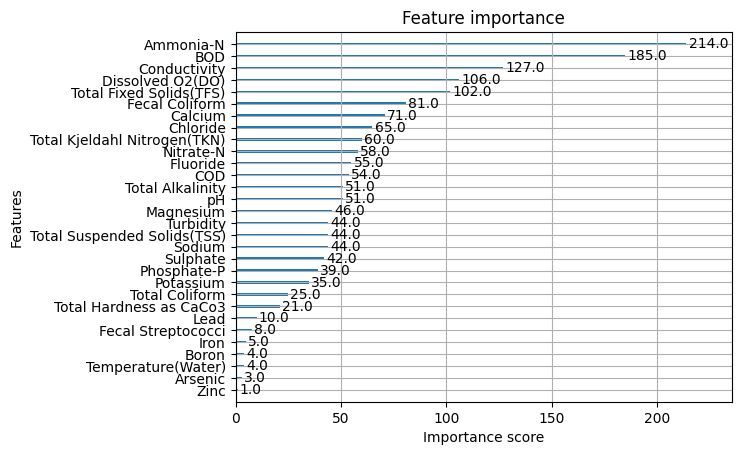

In [83]:
xgb.plot_importance(xgbmodel,ax=plt.gca())
plt.show()

In [84]:
import shap

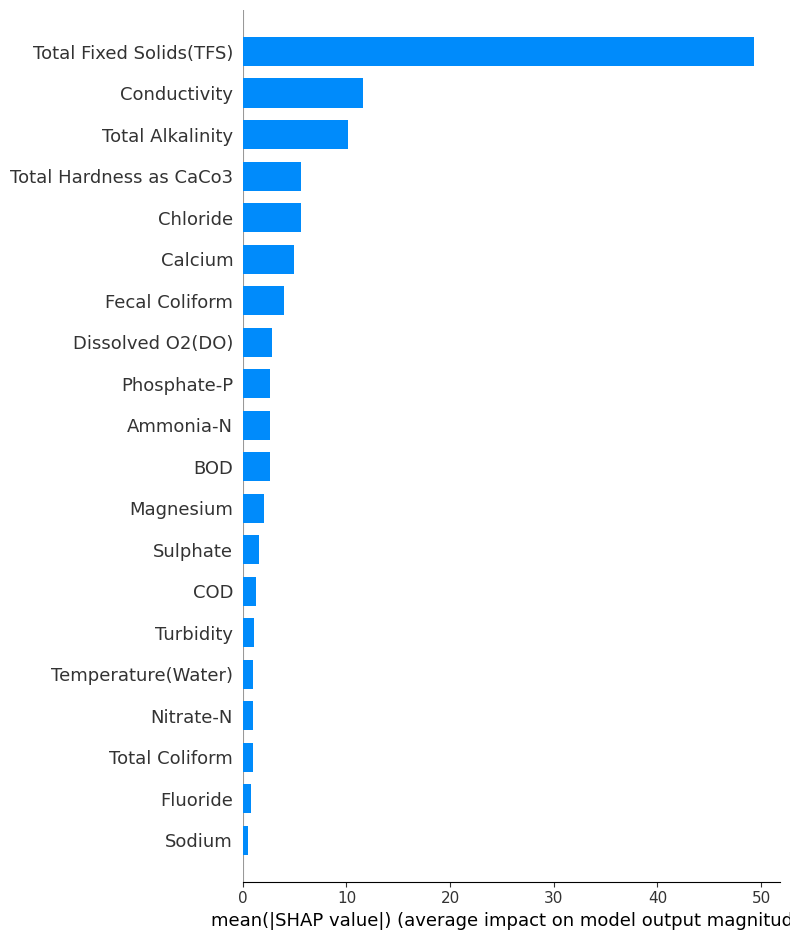

In [85]:
shap_values = shap.TreeExplainer(xgbmodel).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

**Train performance**

In [86]:
pred_train=xgbmodel.predict(X_train)

In [87]:
print(r2_score(y_train,pred_train))

0.9999999999581


In [88]:
print(mean_squared_error(y_train,pred_train))

3.29018212227293e-07


In [89]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, pred_train)
r2 = r2_score(y_train, pred_train)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)


MSE: 3.29018212227293e-07
RMSE: 0.000573601091549949
MAPE: 42527839573.333336
R^2: 0.9999999999581


In [90]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Ensure y_train is a numpy array if it's a pandas Series
y_train_values = y_train.values  # Convert to numpy array if y_train is a pandas Series

# Filter out zero values from y_train and corresponding pred_train
non_zero_indices_train = y_train_values != 0
y_train_non_zero = y_train_values[non_zero_indices_train]
pred_train_non_zero = pred_train[non_zero_indices_train]

# Calculate MAPE without zero values
if len(y_train_non_zero) == len(pred_train_non_zero):
    mape_train = np.mean(np.abs((y_train_non_zero - pred_train_non_zero) / y_train_non_zero)) * 100
    print(f"MAPE (excluding zeros) for training data: {mape_train}%")
else:
    print("Error: y_train and pred_train must be of the same length after filtering.")

# Or use sklearn's built-in MAPE function
mape_train_sklearn = mean_absolute_percentage_error(y_train_non_zero, pred_train_non_zero) * 100
print(f"MAPE (excluding zeros) for training data using sklearn: {mape_train_sklearn}%")

MAPE (excluding zeros) for training data: 0.00018373341577301546%
MAPE (excluding zeros) for training data using sklearn: 0.00018373341577301546%


In [91]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape_train],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

+---------+-------------+-------------+-------------+-------+
|         |         MSE |        RMSE |        MAPE |   R^2 |
+=========+=============+=============+=============+=======+
| Metrics | 3.29018e-07 | 0.000573601 | 0.000183733 |     1 |
+---------+-------------+-------------+-------------+-------+


**Test performance**

In [92]:
predictions = xgbmodel.predict(X_test)

In [93]:
len(y_test)
len(predictions)

41

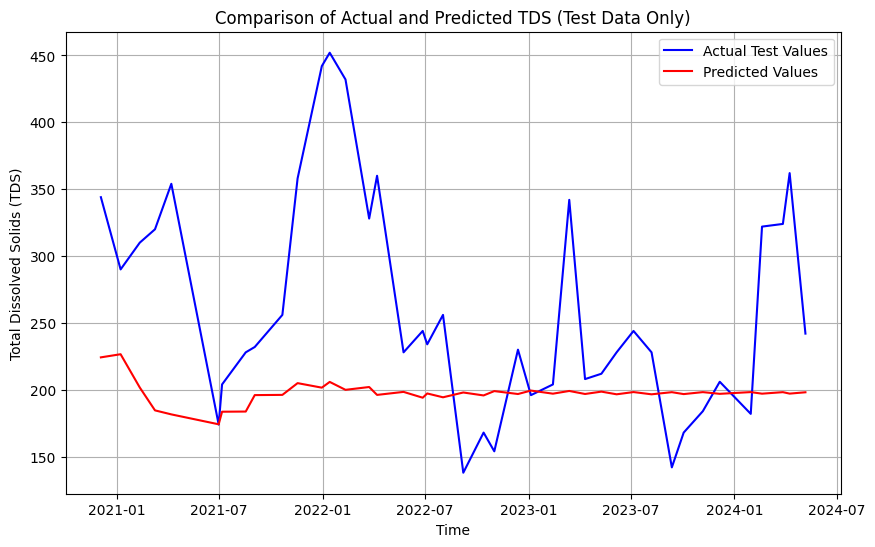

In [94]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Get positional indices for the test data
start_index = train.shape[0]  # First test data point position
end_index = train.shape[0] + len(test) - 1  # Last test data point position

# Train the ARIMA model
model = ARIMA(train['Total Dissolved Solids(TDS)'], order=(4, 1, 3))
model_fit = model.fit()

# Generate predictions
prediction = model_fit.predict(start=start_index, end=end_index)
prediction.index = test.index  # Align predictions with test index

# Plot test values and predictions
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['Total Dissolved Solids(TDS)'], label='Actual Test Values', color='blue')
plt.plot(test.index, prediction, label='Predicted Values', color='red')
plt.xlabel('Time')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS (Test Data Only)')
plt.legend()
plt.grid()
plt.show()


In [95]:
print(y_test)
print(predictions)

Date
2020-08-14    208.0
2020-05-22    148.0
2010-04-22    256.0
2018-10-05    178.0
2011-03-11    238.0
2023-06-06    228.0
2017-10-13    232.0
2021-06-30    174.0
2016-01-22    280.0
2023-03-14    342.0
2014-06-09    306.0
2015-10-05    296.0
2016-06-08    396.0
2022-10-13    168.0
2014-12-08    432.0
2013-05-07    202.0
2018-07-06    288.0
2012-03-12    346.0
2016-12-14    320.0
2017-04-11    272.0
2015-06-15    242.0
2021-12-30    442.0
2021-01-07    290.0
2013-01-07    364.0
2014-07-11    208.0
2019-10-01    110.0
2023-12-06    206.0
2016-11-15    336.0
2016-05-17    180.0
2023-01-05    196.0
2021-10-21    256.0
2019-11-05    188.0
2020-12-03    344.0
2018-01-11    346.0
2015-09-07    138.0
2020-10-08    130.0
2011-11-25    378.0
2020-01-14    232.0
2016-08-16    150.0
2012-01-13    416.0
2010-07-26      0.0
Name: Total Dissolved Solids(TDS), dtype: float64
[199.37614   225.85945   159.25282   200.92955   202.39384   223.16173
 223.36588   219.82454   298.94235   356.1692    315.1

In [96]:
print(mean_squared_error(y_test,predictions))

1596.0988038225178


In [97]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)

MSE: 1596.0988038225178
RMSE: 39.951205286230326
MAPE: 157054147679307.06
R^2: 0.8244745906766099


In [98]:
import numpy as np

# Ensure y_test is a numpy array
y_test_values = y_test.values  # Convert to numpy array if y_test is a pandas Series

# Check if the lengths are equal
if len(y_test_values) == len(predictions):
    # Calculate MAPE
    mape = np.mean(np.abs((y_test_values - predictions) / y_test_values)) * 100
    print(f"MAPE: {mape}%")
else:
    print("Error: y_test and predictions must be of the same length.")

MAPE: inf%


In [99]:
# Filter out zero values from y_test and corresponding predictions
non_zero_indices = y_test_values != 0
y_test_non_zero = y_test_values[non_zero_indices]
predictions_non_zero = predictions[non_zero_indices]

# Calculate MAPE without zero values
if len(y_test_non_zero) == len(predictions_non_zero):
    mape = np.mean(np.abs((y_test_non_zero - predictions_non_zero) / y_test_non_zero)) * 100
    print(f"MAPE (excluding zeros): {mape}%")
else:
    print("Error: y_test and predictions must be of the same length after filtering.")

mean_absolute_percentage_error(y_test_non_zero, predictions_non_zero)


MAPE (excluding zeros): 13.64472918229794%


0.1364472918229794

In [100]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

+---------+--------+---------+---------+----------+
|         |    MSE |    RMSE |    MAPE |      R^2 |
+=========+========+=========+=========+==========+
| Metrics | 1596.1 | 39.9512 | 13.6447 | 0.824475 |
+---------+--------+---------+---------+----------+


123 123


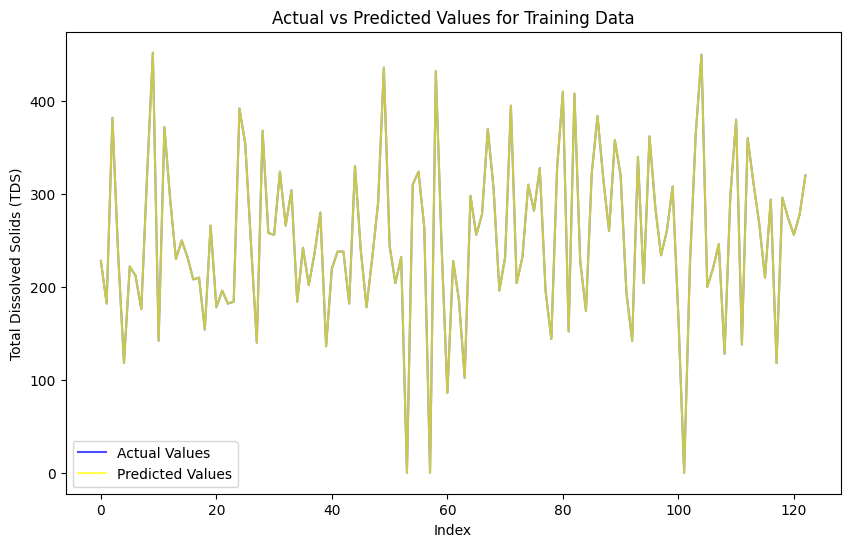

In [101]:
# Check lengths of both datasets
print(len(y_train), len(pred_train))

plt.figure(figsize=(10,6))

# Plot actual values
plt.plot(y_train.values, label='Actual Values', color='blue', alpha=0.7)

# Plot predicted values
plt.plot(pred_train, label='Predicted Values', color='yellow', alpha=0.7)

plt.title('Actual vs Predicted Values for Training Data')
plt.xlabel('Index')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.legend()
plt.show()


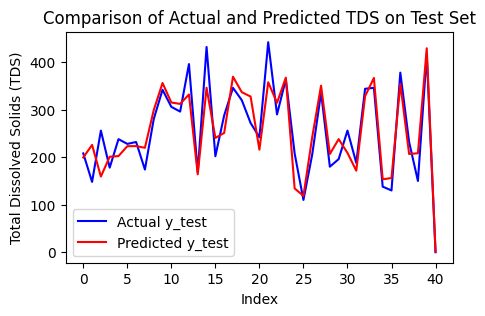

In [102]:
import matplotlib.pyplot as plt

# Plot y_train and pred_train
plt.figure(figsize=(5,3))
plt.plot(y_test.reset_index(drop=True), label='Actual y_test', color='b')
plt.plot(predictions, label='Predicted y_test', color='r')
plt.xlabel('Index')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS on Test Set')
plt.legend()
plt.show()


**Feature Selection using correlation**


we will drop the columns which are highly correlated

In [103]:
X_train.corr()

Ammonia-N       BOD  Conductivity  \
Ammonia-N                      1.000000  0.208639      0.069608   
BOD                            0.208639  1.000000      0.222367   
Conductivity                   0.069608  0.222367      1.000000   
Dissolved O2(DO)              -0.068403  0.232474      0.537820   
Fecal Coliform                 0.013787  0.066111      0.074353   
Fecal Streptococci             0.054031 -0.049655      0.276131   
Nitrate-N                      0.010508  0.193164      0.044251   
pH                             0.065928  0.103748      0.387838   
Temperature(Water)             0.039888 -0.218182      0.160862   
Total Coliform                 0.017845  0.048379      0.043228   
Boron                         -0.072156  0.109265     -0.060124   
Calcium                       -0.011269  0.282959      0.622024   
Chloride                       0.271567  0.269474      0.484430   
COD                           -0.124365  0.498972     -0.014001   
Fluoride                       0.098703  0.111536      0.063954   
Magnesium                      0.088064  0.046753      0.431630   
Phenolpthalein Alkanity       -0.016217  0.119181      0.088686   
Phosphate-P                    0.027871 -0.240131      0.010477   
Potassium                      0.033920  0.095738      0.087207   
Sodium                         0.374342  0.210396      0.434568   
Total Alkalinity               0.093312  0.260816      0.741813   
Total Fixed Solids(TFS)       -0.052688  0.097408      0.545569   
Total Hardness as CaCo3        0.029744  0.234418      0.681489   
Total Kjeldahl Nitrogen(TKN)  -0.007007  0.256829      0.070908   
Total Suspended Solids(TSS)   -0.061135 -0.065785     -0.233086   
Turbidity                     -0.101697 -0.051363     -0.255444   
Arsenic                       -0.016913  0.066881      0.167885   
Cadmium                             NaN       NaN           NaN   
Chromium Total                -0.050868 -0.048326      0.045672   
Copper                         0.073663  0.094785      0.079549   
Iron                          -0.024836  0.015643      0.188142   
Mercury                             NaN       NaN           NaN   
Nickel                        -0.050868 -0.048326      0.045672   
Zinc                           0.026729  0.056185      0.210385   
a-BHC                         -0.050868 -0.048326      0.045672   
a-Endosulphan                       NaN       NaN           NaN   
Aldrin                              NaN       NaN           NaN   
Anilophos                           NaN       NaN           NaN   
b-Endosulphan                       NaN       NaN           NaN   
Chlorpyriphos                 -0.022458  0.185280     -0.009822   
Dieldrin                            NaN       NaN           NaN   
g-BHC                               NaN       NaN           NaN   
Malathion                      0.049935  0.166012      0.063561   
o,p-DDT                             NaN       NaN           NaN   
p,p-DDT                             NaN       NaN           NaN   
Sulphate                       0.046813 -0.066155     -0.103469   
Lead                          -0.019040  0.005488      0.124015   
Methyl Parathion              -0.012674 -0.048326     -0.010858   

                              Dissolved O2(DO)  Fecal Coliform  \
Ammonia-N                            -0.068403        0.013787   
BOD                                   0.232474        0.066111   
Conductivity                          0.537820        0.074353   
Dissolved O2(DO)                      1.000000        0.059968   
Fecal Coliform                        0.059968        1.000000   
Fecal Streptococci                   -0.110048       -0.180862   
Nitrate-N                            -0.058259        0.069702   
pH                                    0.473687        0.072043   
Temperature(Water)                   -0.235594       -0.356361   
Total Coliform                        0.039895        0.977951   
Boron               

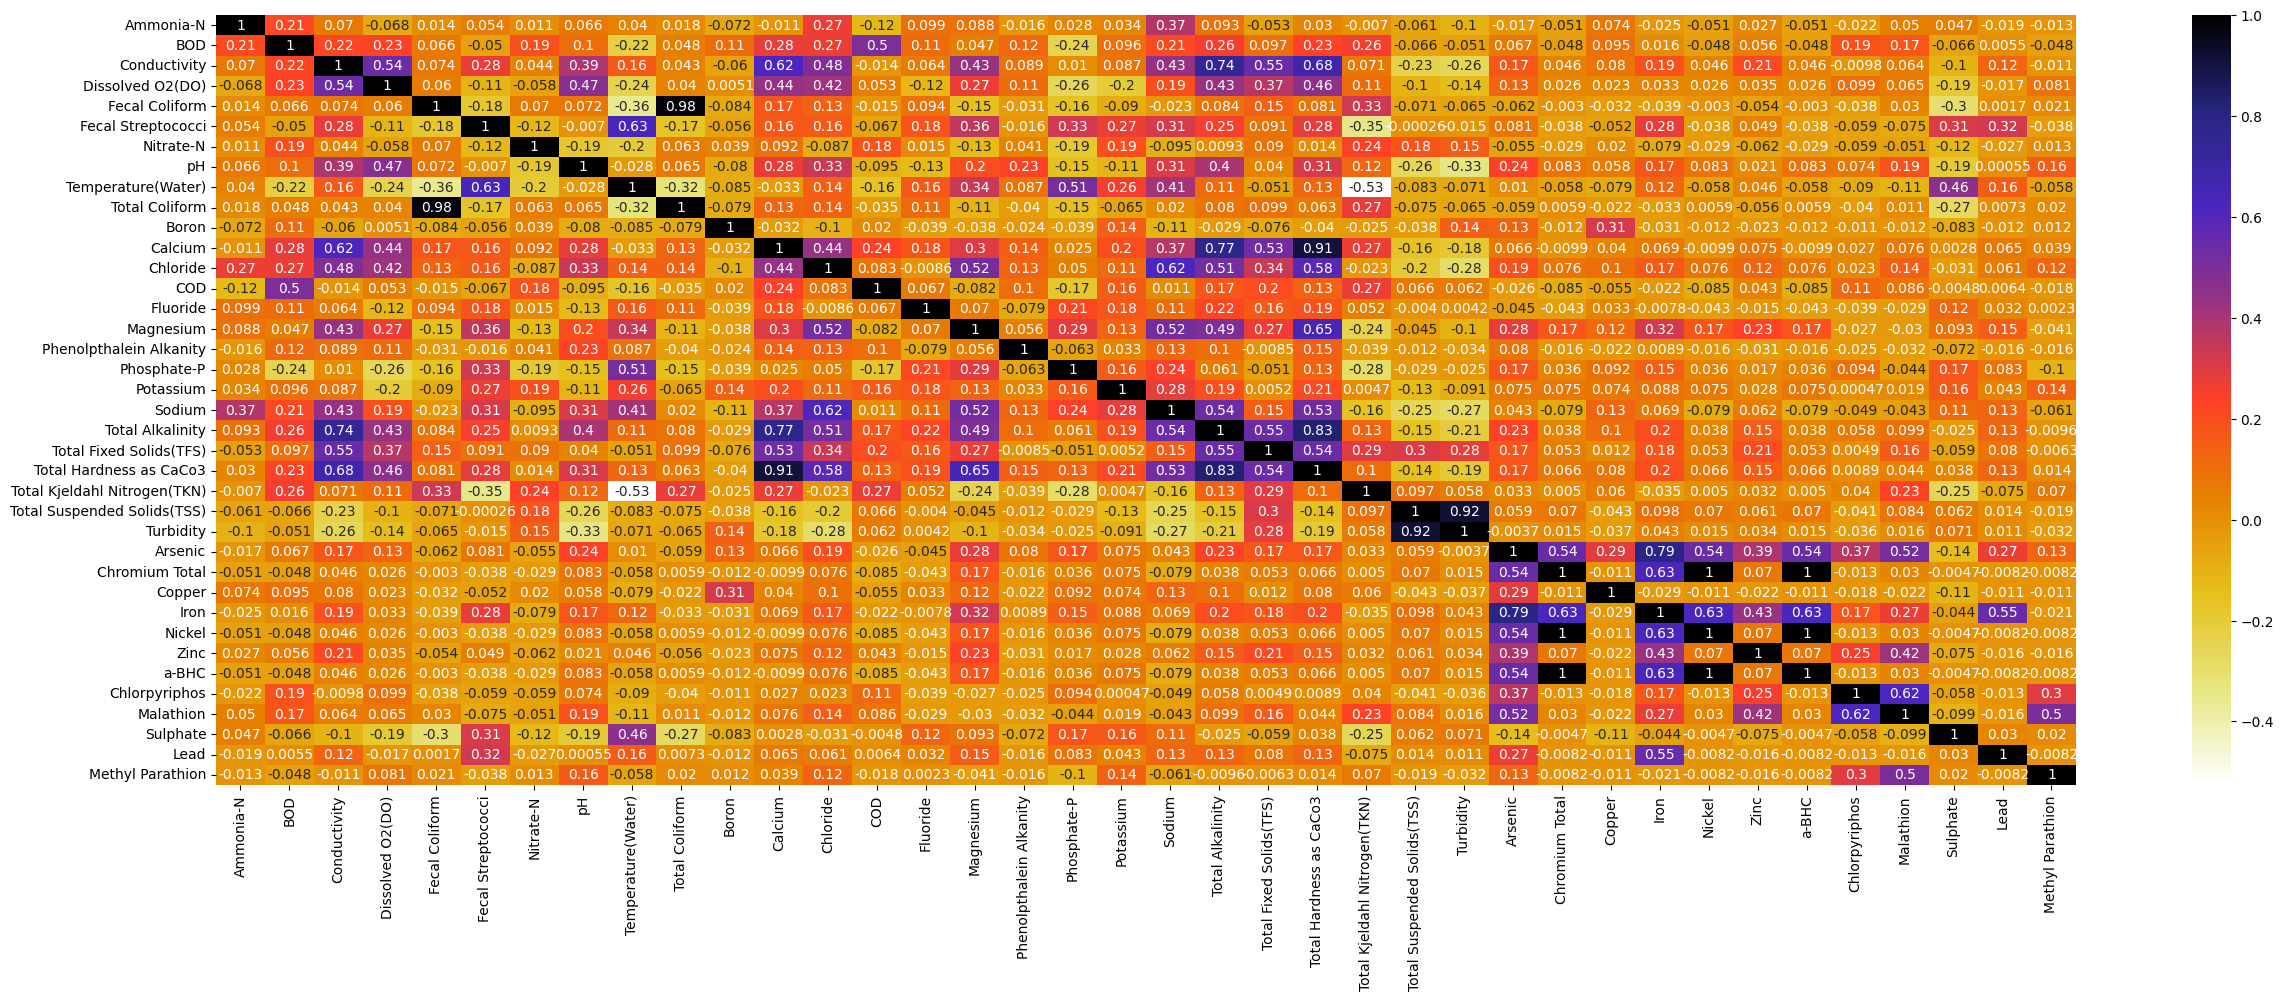

In [104]:
# Compute correlation matrix with NaNs
cor = X_train.corr()

# Drop rows and columns with all NaN values
cor = cor.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Plot the cleaned correlation matrix
plt.figure(figsize=(30,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [105]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [106]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

7

In [107]:
corr_features

{'Iron',
 'Nickel',
 'Total Alkalinity',
 'Total Coliform',
 'Total Hardness as CaCo3',
 'Turbidity',
 'a-BHC'}

Removing those columns

In [108]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [109]:
X_test.columns

Index(['Ammonia-N', 'BOD', 'Conductivity', 'Dissolved O2(DO)',
       'Fecal Coliform', 'Fecal Streptococci', 'Nitrate-N', 'pH',
       'Temperature(Water)', 'Boron', 'Calcium', 'Chloride', 'COD', 'Fluoride',
       'Magnesium', 'Phenolpthalein Alkanity', 'Phosphate-P', 'Potassium',
       'Sodium', 'Total Fixed Solids(TFS)', 'Total Kjeldahl Nitrogen(TKN)',
       'Total Suspended Solids(TSS)', 'Arsenic', 'Cadmium', 'Chromium Total',
       'Copper', 'Mercury', 'Zinc', 'a-Endosulphan', 'Aldrin', 'Anilophos',
       'b-Endosulphan', 'Chlorpyriphos', 'Dieldrin', 'g-BHC', 'Malathion',
       'o,p-DDT', 'p,p-DDT', 'Sulphate', 'Lead', 'Methyl Parathion'],
      dtype='object')

In [110]:
xgbmodel.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

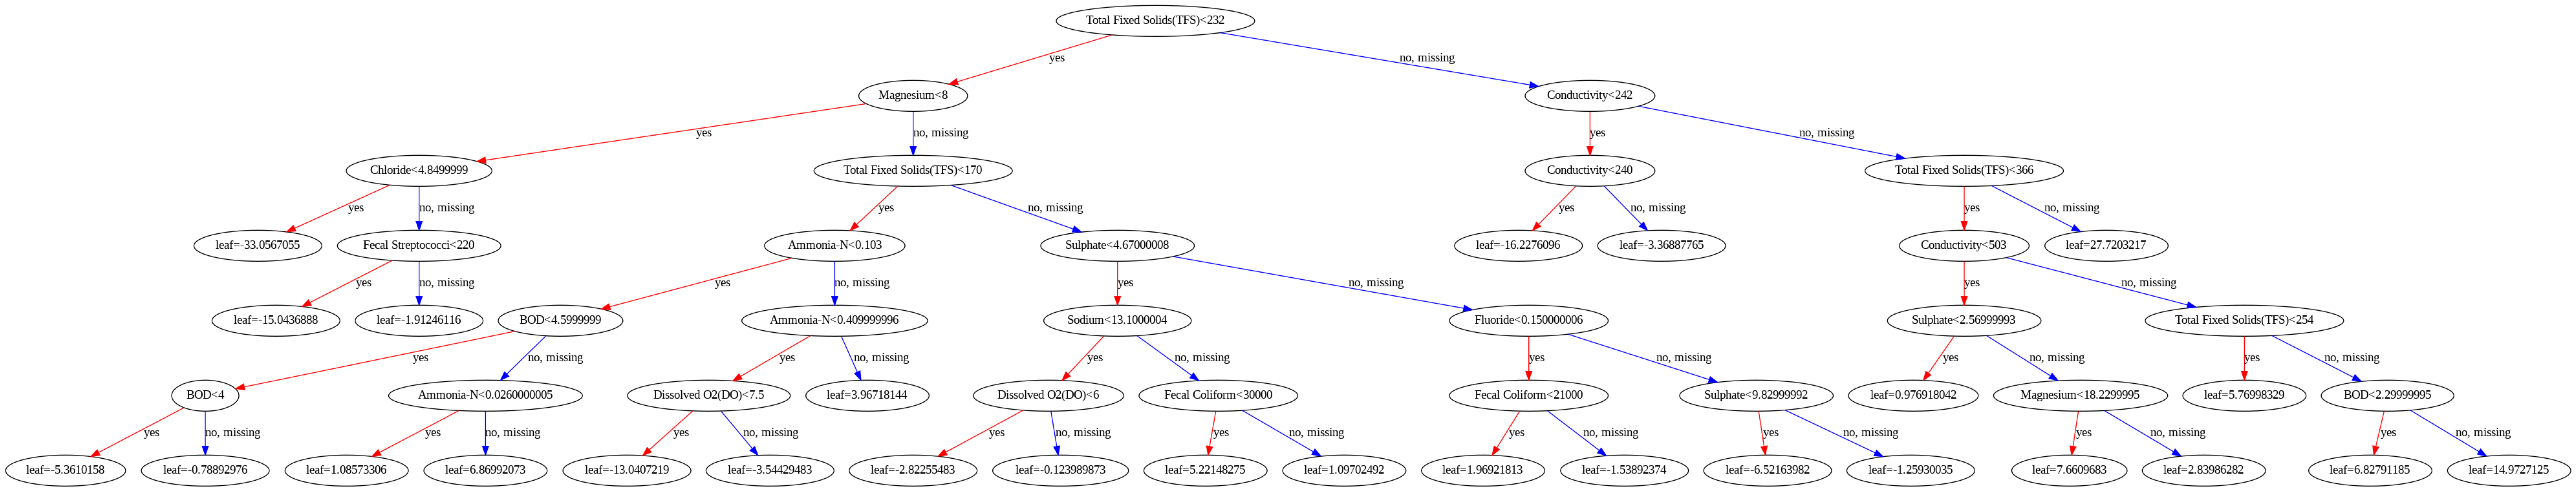

In [111]:
import matplotlib.pyplot
xgb.plot_tree(xgbmodel, num_trees=2)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

**Train performance**

In [112]:
pred_train=xgbmodel.predict(X_train)

In [113]:
print(r2_score(y_train,pred_train))

0.9999999999456678


In [114]:
print(y_train)
print(pred_train)

Date
2021-08-17    228.0
2019-05-17    182.0
2017-03-09    382.0
2014-08-12    234.0
2011-09-19    118.0
              ...  
2013-03-08    296.0
2012-11-19    274.0
2018-04-06    256.0
2012-08-21    278.0
2021-03-09    320.0
Name: Total Dissolved Solids(TDS), Length: 123, dtype: float64
[ 2.2800000e+02  1.8200035e+02  3.8200024e+02  2.3400006e+02
  1.1800009e+02  2.2200163e+02  2.1199980e+02  1.7600049e+02
  3.2000162e+02  4.5199921e+02  1.4200012e+02  3.7199963e+02
  2.9400015e+02  2.2999919e+02  2.4999994e+02  2.3199976e+02
  2.0800055e+02  2.0999959e+02  1.5399992e+02  2.6599982e+02
  1.7800009e+02  1.9600035e+02  1.8200052e+02  1.8399986e+02
  3.9199976e+02  3.5399908e+02  2.4600015e+02  1.3999983e+02
  3.6799915e+02  2.5800067e+02  2.5599988e+02  3.2400003e+02
  2.6599963e+02  3.0399783e+02  1.8400063e+02  2.4199950e+02
  2.0200055e+02  2.3600140e+02  2.7999854e+02  1.3599942e+02
  2.1999954e+02  2.3799942e+02  2.3800002e+02  1.8199989e+02
  3.3000037e+02  2.4000067e+02  1.7800034

In [115]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, pred_train)
r2 = r2_score(y_train, pred_train)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)


MSE: 4.266405519461529e-07
RMSE: 0.0006531772745175332
MAPE: 32100641184.260162
R^2: 0.9999999999456678


In [116]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Ensure y_train is a numpy array if it's a pandas Series
y_train_values = y_train.values  # Convert to numpy array if y_train is a pandas Series

# Filter out zero values from y_train and corresponding pred_train
non_zero_indices_train = y_train_values != 0
y_train_non_zero = y_train_values[non_zero_indices_train]
pred_train_non_zero = pred_train[non_zero_indices_train]

# Calculate MAPE without zero values
if len(y_train_non_zero) == len(pred_train_non_zero):
    mape_train = np.mean(np.abs((y_train_non_zero - pred_train_non_zero) / y_train_non_zero)) * 100
    print(f"MAPE (excluding zeros) for training data: {mape_train}%")
else:
    print("Error: y_train and pred_train must be of the same length after filtering.")

# Or use sklearn's built-in MAPE function
mape_train_sklearn = mean_absolute_percentage_error(y_train_non_zero, pred_train_non_zero) * 100
print(f"MAPE (excluding zeros) for training data using sklearn: {mape_train_sklearn}%")

MAPE (excluding zeros) for training data: 0.00020360785083737234%
MAPE (excluding zeros) for training data using sklearn: 0.00020360785083737234%


mape value between 10 to 20 good


less than 10 accurate

In [117]:
import pandas as pd

# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE %": [mape_train],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame
print(metrics_df)

                  MSE      RMSE    MAPE %  R^2
Metrics  4.266406e-07  0.000653  0.000204  1.0


In [118]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape_train],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

+---------+-------------+-------------+-------------+-------+
|         |         MSE |        RMSE |        MAPE |   R^2 |
+=========+=============+=============+=============+=======+
| Metrics | 4.26641e-07 | 0.000653177 | 0.000203608 |     1 |
+---------+-------------+-------------+-------------+-------+


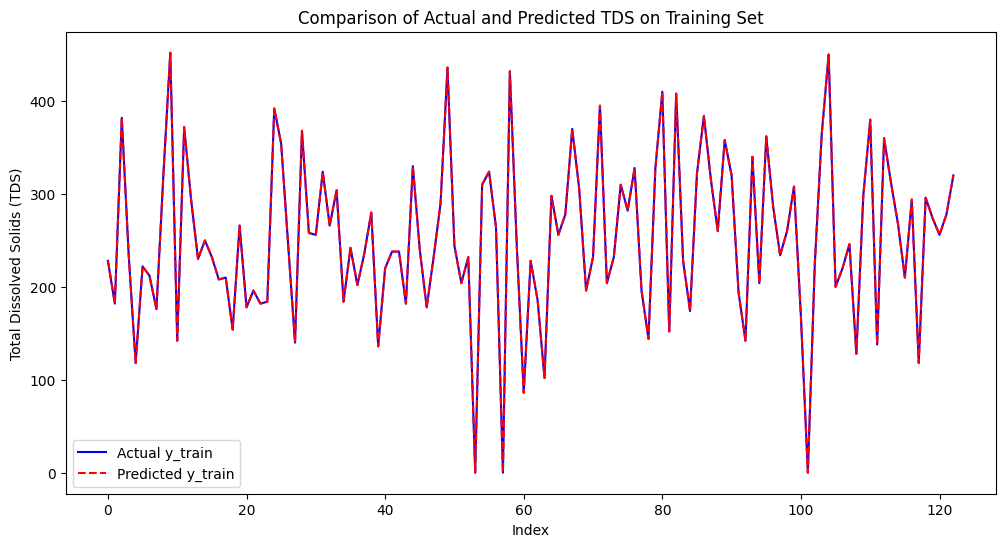

In [119]:
import matplotlib.pyplot as plt

# Plot y_train and pred_train
plt.figure(figsize=(12, 6))
plt.plot(y_train.reset_index(drop=True), label='Actual y_train', color='b')
plt.plot(pred_train, label='Predicted y_train', color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS on Training Set')
plt.legend()
plt.show()


**Test performance**

In [120]:
predictions = xgbmodel.predict(X_test)
xgb_pred = predictions

In [121]:
print(len(y_test))
print(len(predictions))

41
41


This particular value is causing a lot of error as it is an outlier value.

In [122]:
#y_test.loc['2019-11-15'] = y_test.median()  # or use neighboring values


In [123]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)


MSE: 1430.698568338739
RMSE: 37.82457624797321
MAPE: 26490769033166.17
R^2: 0.8426639057528109


In [124]:
import numpy as np

# Ensure y_test is a numpy array
y_test_values = y_test.values  # Convert to numpy array if y_test is a pandas Series

# Check if the lengths are equal
if len(y_test_values) == len(predictions):
    # Calculate MAPE
    mape = np.mean(np.abs((y_test_values - predictions) / y_test_values)) * 100
    print(f"MAPE: {mape}%")
else:
    print("Error: y_test and predictions must be of the same length.")


MAPE: inf%


In [125]:
# Filter out zero values from y_test and corresponding predictions
non_zero_indices = y_test_values != 0
y_test_non_zero = y_test_values[non_zero_indices]
predictions_non_zero = predictions[non_zero_indices]

# Calculate MAPE without zero values
if len(y_test_non_zero) == len(predictions_non_zero):
    mape = np.mean(np.abs((y_test_non_zero - predictions_non_zero) / y_test_non_zero)) * 100
    print(f"MAPE (excluding zeros): {mape}%")
else:
    print("Error: y_test and predictions must be of the same length after filtering.")

mean_absolute_percentage_error(y_test_non_zero, predictions_non_zero)


MAPE (excluding zeros): 12.76872476924185%


0.1276872476924185

In [126]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))


+---------+--------+---------+---------+----------+
|         |    MSE |    RMSE |    MAPE |      R^2 |
+=========+========+=========+=========+==========+
| Metrics | 1430.7 | 37.8246 | 12.7687 | 0.842664 |
+---------+--------+---------+---------+----------+


In [127]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate Relative RMSE
mean_actual = y_test.mean()
relative_rmse = rmse / mean_actual

# Calculate Normalized RMSE
range_actual = y_test.max() - y_test.min()
normalized_rmse = rmse / range_actual

# Display the results
results = {
    'Metric': ['RMSE', 'Relative RMSE', 'Normalized RMSE'],
    'Value': [rmse, relative_rmse, normalized_rmse]
}

results_df = pd.DataFrame(results)
print(results_df)

            Metric      Value
0             RMSE  37.824576
1    Relative RMSE   0.148232
2  Normalized RMSE   0.085576


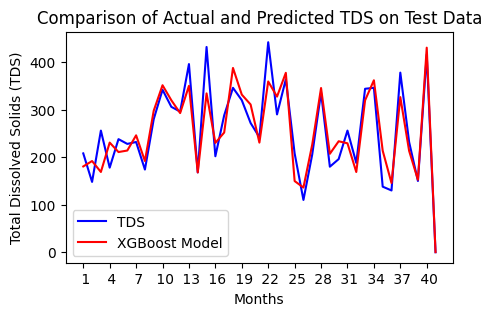

In [128]:
import matplotlib.pyplot as plt

# Generate month labels for x-axis
months = [f' {i+1}' for i in range(len(y_test))]

# Select only every third month for x-axis labels
xticks_interval = 3
xticks_positions = list(range(0, len(months), xticks_interval))
xticks_labels = [months[i] for i in xticks_positions]

# Plot Actual vs Predicted values
plt.figure(figsize=(5, 3))
plt.plot(months, y_test.reset_index(drop=True), label='TDS', color='b')
plt.plot(months, predictions, label='XGBoost Model', color='r')
plt.xlabel('Months')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS on Test Data')
plt.legend()
plt.xticks(ticks=xticks_positions, labels=xticks_labels,)  # Set ticks at intervals
plt.show()


Forecast values for the next 12 months: [np.float32(0.24116743), np.float32(1.728205), np.float32(25.531805), np.float32(25.551702), np.float32(1.0281023), np.float32(69.60545), np.float32(69.93281), np.float32(24.809284), np.float32(69.60545), np.float32(69.60545), np.float32(69.60545), np.float32(69.60545)]


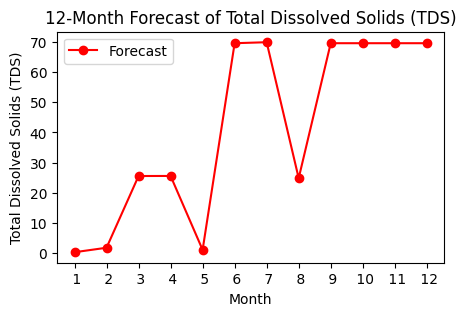

In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# Assuming `model` is your trained XGBoost model and `future_X` contains features for forecasting

# Generate forecast for the next 12 months
future_X = X_test.tail(1).copy()
forecast = []
current_X = future_X.copy()

for _ in range(12):
    pred = xgbmodel.predict(current_X)
    forecast.append(pred[0])
    # Update features for next month
    current_X.iloc[0, :] = current_X.iloc[0, :].shift(-1, fill_value=pred[0])

# Print forecast values
print("Forecast values for the next 12 months:", forecast)

# Plot the forecast
plt.figure(figsize=(5,3))
plt.plot(range(1, 13), forecast, marker='o', color='r', label='Forecast')
plt.xlabel('Month')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('12-Month Forecast of Total Dissolved Solids (TDS)')
plt.xticks(ticks=range(1, 13), labels=[f' {i}' for i in range(1, 13)])
plt.legend()
plt.show()


# **Lightgbm**

In [130]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from lightgbm import LGBMRegressor
import numpy as np
import pandas as pd


# Train-test split
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.fillna(0)  # Handle any NaN values that may arise

y_train = y_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.fillna(0)  # Handle any NaN values that may arise

X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test = X_test.fillna(0)  # Handle any NaN values that may arise

y_test = y_test.apply(pd.to_numeric, errors='coerce')
y_test = y_test.fillna(0)  # Handle any NaN values that may arise

# LightGBM model
#lgbmr = LGBMRegressor(learning_rate=0.1, max_depth=-1, random_state=42)
#lgbmr = LGBMRegressor(learning_rate=0.2, feature_fraction=0.8,max_depth=-1, random_state=42,lambda_l2=1)
#lgbmr = LGBMRegressor(learning_rate=0.2, feature_fraction=0.8,lambda_l2=1)
lgbmr = LGBMRegressor(
    learning_rate=0.05,  # Lower learning rate
    n_estimators=1000,   # More boosting rounds
    num_leaves=31,       # Control complexity
    min_data_in_leaf=10, # Prevent overfitting
    lambda_l2=0.1,       # Reduce regularization strength
    random_state=42
)


# Clean the column names before fitting the model
X_train.columns = X_train.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True) # Replace special characters with underscores
X_test.columns = X_test.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True) # Replace special characters with underscores


# Fit the model with early stopping
lgbmr.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    callbacks=[lgb.early_stopping(stopping_rounds=20)]
)

# Make predictions
y_pred = lgbmr.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 123, number of used features: 26
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. C

**Train performance**

In [131]:
pred_train=lgbmr.predict(X_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1


In [132]:
print(r2_score(y_train,pred_train))

0.9974477604668015


In [133]:
print(y_train)
print(pred_train)

Date
2021-08-17    228.0
2019-05-17    182.0
2017-03-09    382.0
2014-08-12    234.0
2011-09-19    118.0
              ...  
2013-03-08    296.0
2012-11-19    274.0
2018-04-06    256.0
2012-08-21    278.0
2021-03-09    320.0
Name: Total Dissolved Solids(TDS), Length: 123, dtype: float64
[226.50715075 179.88585082 378.00969961 237.43036159 133.90073107
 223.22264777 213.33381439 180.65054295 319.60447413 444.15603824
 135.01891213 372.14392391 293.91879691 230.42567551 252.03668055
 227.73097889 209.19086491 210.12719565 158.09900915 262.35654863
 182.02481308 199.57131551 183.93660262 183.12467132 389.88067597
 350.24608344 243.74981001 139.38651138 366.76173355 257.78266414
 256.38629169 326.62439646 263.42029147 304.73370229 180.91660738
 241.70486735 205.15217565 238.34824663 277.97577292 136.80344432
 222.80784037 238.25391286 239.10332524 186.81109179 328.59403526
 241.69918267 177.51699985 231.19721679 290.11355954 432.98292686
 242.41516284 202.48966603 235.13364094   9.10073531

In [134]:
print(mean_squared_error(y_train,pred_train))

20.041331627044467


In [135]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, pred_train)
r2 = r2_score(y_train, pred_train)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)


MSE: 20.041331627044467
RMSE: 4.476754586421336
MAPE: 999660198457922.1
R^2: 0.9974477604668015


In [136]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Ensure y_train is a numpy array if it's a pandas Series
y_train_values = y_train.values  # Convert to numpy array if y_train is a pandas Series

# Filter out zero values from y_train and corresponding pred_train
non_zero_indices_train = y_train_values != 0
y_train_non_zero = y_train_values[non_zero_indices_train]
pred_train_non_zero = pred_train[non_zero_indices_train]

# Calculate MAPE without zero values
if len(y_train_non_zero) == len(pred_train_non_zero):
    mape_train = np.mean(np.abs((y_train_non_zero - pred_train_non_zero) / y_train_non_zero)) * 100
    print(f"MAPE (excluding zeros) for training data: {mape_train}%")
else:
    print("Error: y_train and pred_train must be of the same length after filtering.")

# Or use sklearn's built-in MAPE function
mape_train_sklearn = mean_absolute_percentage_error(y_train_non_zero, pred_train_non_zero) * 100
print(f"MAPE (excluding zeros) for training data using sklearn: {mape_train_sklearn}%")

MAPE (excluding zeros) for training data: 1.1941842410623245%
MAPE (excluding zeros) for training data using sklearn: 1.1941842410623245%


In [137]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape_train],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

+---------+---------+---------+---------+----------+
|         |     MSE |    RMSE |    MAPE |      R^2 |
+=========+=========+=========+=========+==========+
| Metrics | 20.0413 | 4.47675 | 1.19418 | 0.997448 |
+---------+---------+---------+---------+----------+


123 123


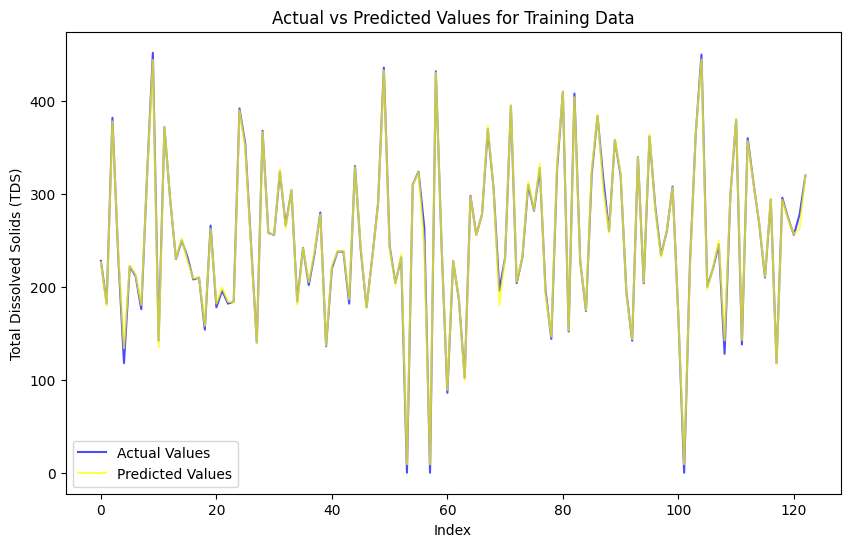

In [138]:
# Check lengths of both datasets
print(len(y_train), len(pred_train))

plt.figure(figsize=(10,6))

# Plot actual values
plt.plot(y_train.values, label='Actual Values', color='blue', alpha=0.7)

# Plot predicted values
plt.plot(pred_train, label='Predicted Values', color='yellow', alpha=0.7)

plt.title('Actual vs Predicted Values for Training Data')
plt.xlabel('Index')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.legend()
plt.show()


**Test performance**

In [139]:
predictions = lgbmr.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1


In [140]:
len(y_test)
len(predictions)

41

In [141]:
#y_test.loc['2019-11-15'] = y_test.median()

In [142]:
print(y_test)
print(predictions)

Date
2020-08-14    208.0
2020-05-22    148.0
2010-04-22    256.0
2018-10-05    178.0
2011-03-11    238.0
2023-06-06    228.0
2017-10-13    232.0
2021-06-30    174.0
2016-01-22    280.0
2023-03-14    342.0
2014-06-09    306.0
2015-10-05    296.0
2016-06-08    396.0
2022-10-13    168.0
2014-12-08    432.0
2013-05-07    202.0
2018-07-06    288.0
2012-03-12    346.0
2016-12-14    320.0
2017-04-11    272.0
2015-06-15    242.0
2021-12-30    442.0
2021-01-07    290.0
2013-01-07    364.0
2014-07-11    208.0
2019-10-01    110.0
2023-12-06    206.0
2016-11-15    336.0
2016-05-17    180.0
2023-01-05    196.0
2021-10-21    256.0
2019-11-05    188.0
2020-12-03    344.0
2018-01-11    346.0
2015-09-07    138.0
2020-10-08    130.0
2011-11-25    378.0
2020-01-14    232.0
2016-08-16    150.0
2012-01-13    416.0
2010-07-26      0.0
Name: Total Dissolved Solids(TDS), dtype: float64
[228.2386853  220.86700185 230.72704675 203.04637516 218.72860787
 210.20121838 209.37853599 209.94983314 281.38344186 357.27

In [143]:
print(mean_squared_error(y_test,predictions))

1171.0577091123064


In [144]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)

MSE: 1171.0577091123064
RMSE: 34.22072046454175
MAPE: 1537193697323731.2
R^2: 0.8712170053376559


In [145]:
import numpy as np

# Ensure y_test is a numpy array
y_test_values = y_test.values  # Convert to numpy array if y_test is a pandas Series

# Check if the lengths are equal
if len(y_test_values) == len(predictions):
    # Calculate MAPE
    mape = np.mean(np.abs((y_test_values - predictions) / y_test_values)) * 100
    print(f"MAPE: {mape}%")
else:
    print("Error: y_test and predictions must be of the same length.")

MAPE: inf%


In [146]:
# Filter out zero values from y_test and corresponding predictions
non_zero_indices = y_test_values != 0
y_test_non_zero = y_test_values[non_zero_indices]
predictions_non_zero = predictions[non_zero_indices]

# Calculate MAPE without zero values
if len(y_test_non_zero) == len(predictions_non_zero):
    mape = np.mean(np.abs((y_test_non_zero - predictions_non_zero) / y_test_non_zero)) * 100
    print(f"MAPE (excluding zeros): {mape}%")
else:
    print("Error: y_test and predictions must be of the same length after filtering.")

mean_absolute_percentage_error(y_test_non_zero, predictions_non_zero)

MAPE (excluding zeros): 11.882852440856059%


0.11882852440856059

In [147]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

+---------+---------+---------+---------+----------+
|         |     MSE |    RMSE |    MAPE |      R^2 |
+=========+=========+=========+=========+==========+
| Metrics | 1171.06 | 34.2207 | 11.8829 | 0.871217 |
+---------+---------+---------+---------+----------+


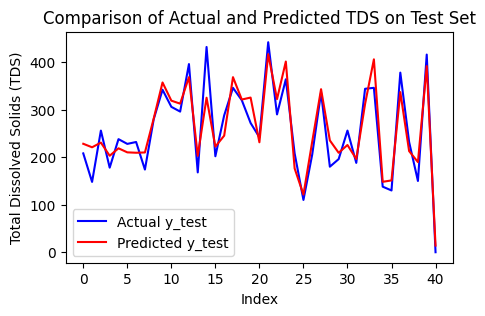

In [148]:
import matplotlib.pyplot as plt

# Plot y_train and pred_train
plt.figure(figsize=(5,3))
plt.plot(y_test.reset_index(drop=True), label='Actual y_test', color='b')
plt.plot(predictions, label='Predicted y_test', color='r')
plt.xlabel('Index')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS on Test Set')
plt.legend()
plt.show()

Feature selection

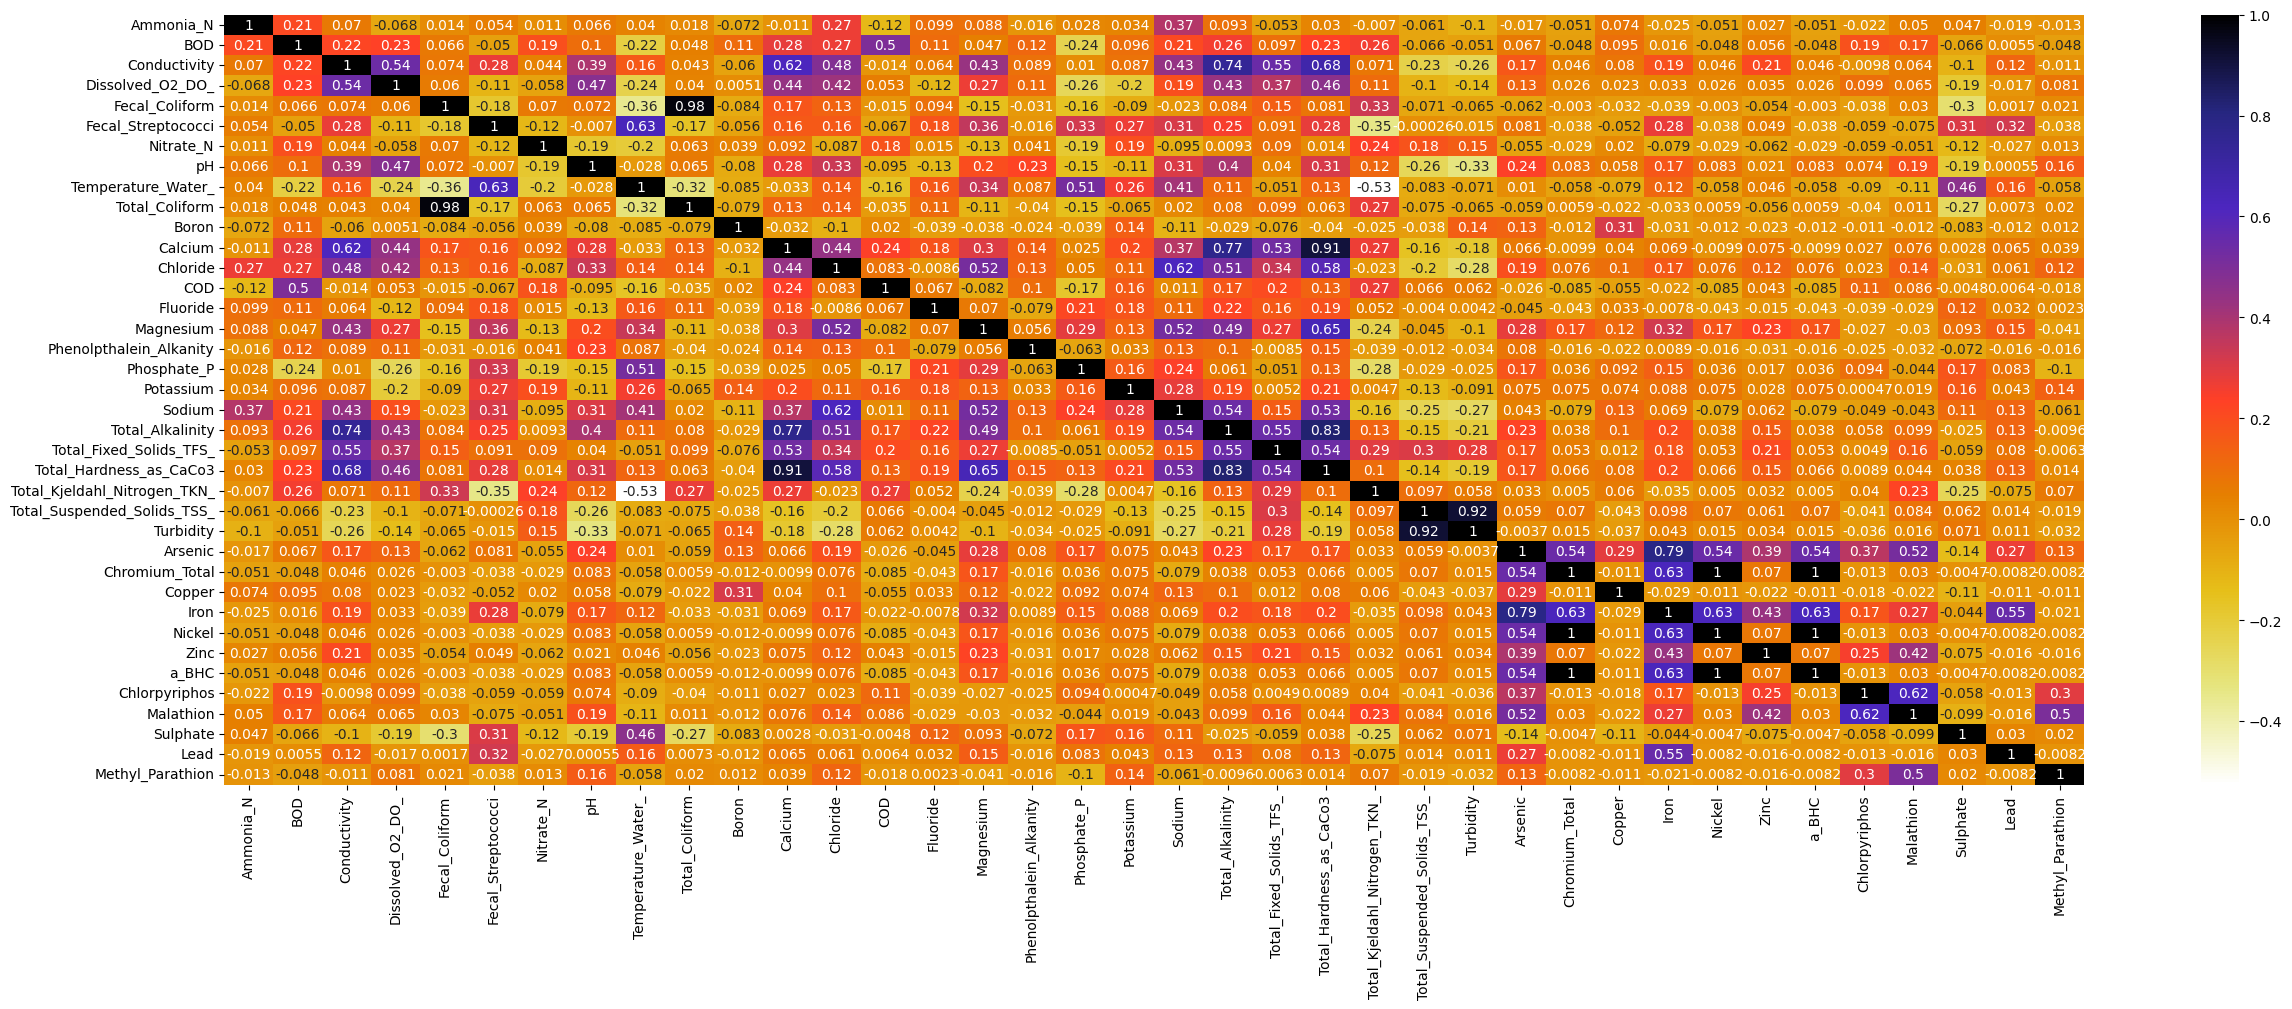

In [149]:
# Compute correlation matrix with NaNs
cor = X_train.corr()

# Drop rows and columns with all NaN values
cor = cor.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Plot the cleaned correlation matrix
plt.figure(figsize=(30,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [150]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [151]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

7

In [152]:
corr_features

{'Iron',
 'Nickel',
 'Total_Alkalinity',
 'Total_Coliform',
 'Total_Hardness_as_CaCo3',
 'Turbidity',
 'a_BHC'}

In [153]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [154]:
lgbmr.fit(X_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 599
[LightGBM] [Info] Number of data points in the train set: 123, number of used features: 22
[LightGBM] [Info] Start training from score 252.609756
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMRegressor(lambda_l2=0.1, learning_rate=0.05, min_data_in_leaf=10,
              n_estimators=1000, random_state=42)

**Train performance**

In [155]:
pred_train=lgbmr.predict(X_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1


In [156]:
print(r2_score(y_train,pred_train))

0.9999987803168988


In [157]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, pred_train)
r2 = r2_score(y_train, pred_train)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)

MSE: 0.00957749975771595
RMSE: 0.09786470128558075
MAPE: 10784346537415.963
R^2: 0.9999987803168988


In [158]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Ensure y_train is a numpy array if it's a pandas Series
y_train_values = y_train.values  # Convert to numpy array if y_train is a pandas Series

# Filter out zero values from y_train and corresponding pred_train
non_zero_indices_train = y_train_values != 0
y_train_non_zero = y_train_values[non_zero_indices_train]
pred_train_non_zero = pred_train[non_zero_indices_train]

# Calculate MAPE without zero values
if len(y_train_non_zero) == len(pred_train_non_zero):
    mape_train = np.mean(np.abs((y_train_non_zero - pred_train_non_zero) / y_train_non_zero)) * 100
    print(f"MAPE (excluding zeros) for training data: {mape_train}%")
else:
    print("Error: y_train and pred_train must be of the same length after filtering.")

# Or use sklearn's built-in MAPE function
mape_train_sklearn = mean_absolute_percentage_error(y_train_non_zero, pred_train_non_zero) * 100
print(f"MAPE (excluding zeros) for training data using sklearn: {mape_train_sklearn}%")

MAPE (excluding zeros) for training data: 0.014414023383452438%
MAPE (excluding zeros) for training data using sklearn: 0.014414023383452438%


In [159]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape_train],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

+---------+-----------+-----------+----------+----------+
|         |       MSE |      RMSE |     MAPE |      R^2 |
+=========+===========+===========+==========+==========+
| Metrics | 0.0095775 | 0.0978647 | 0.014414 | 0.999999 |
+---------+-----------+-----------+----------+----------+


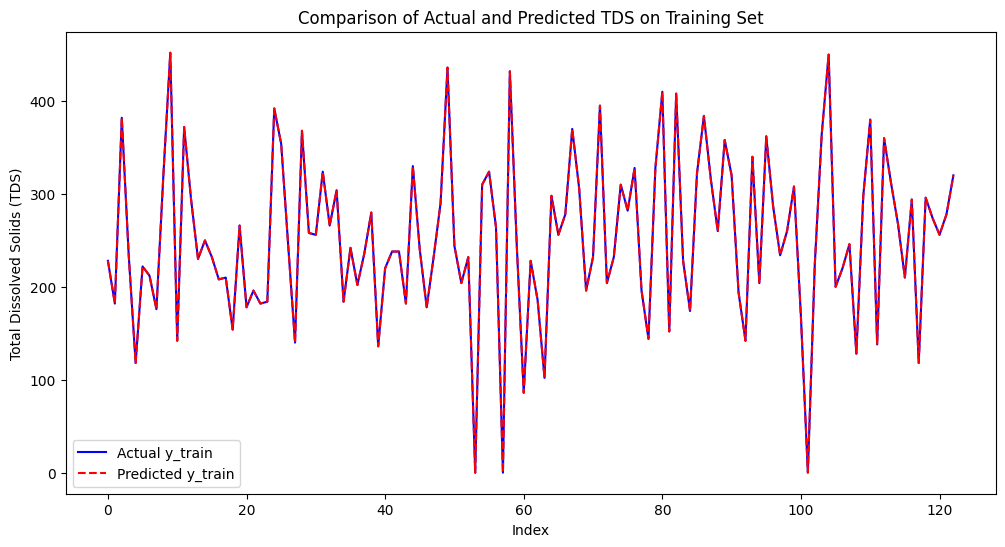

In [160]:
import matplotlib.pyplot as plt

# Plot y_train and pred_train
plt.figure(figsize=(12, 6))
plt.plot(y_train.reset_index(drop=True), label='Actual y_train', color='b')
plt.plot(pred_train, label='Predicted y_train', color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS on Training Set')
plt.legend()
plt.show()

**Test performance**

In [161]:
predictions = lgbmr.predict(X_test)
lgb_pred = predictions

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1


In [162]:
print(y_test)
print(predictions)

Date
2020-08-14    208.0
2020-05-22    148.0
2010-04-22    256.0
2018-10-05    178.0
2011-03-11    238.0
2023-06-06    228.0
2017-10-13    232.0
2021-06-30    174.0
2016-01-22    280.0
2023-03-14    342.0
2014-06-09    306.0
2015-10-05    296.0
2016-06-08    396.0
2022-10-13    168.0
2014-12-08    432.0
2013-05-07    202.0
2018-07-06    288.0
2012-03-12    346.0
2016-12-14    320.0
2017-04-11    272.0
2015-06-15    242.0
2021-12-30    442.0
2021-01-07    290.0
2013-01-07    364.0
2014-07-11    208.0
2019-10-01    110.0
2023-12-06    206.0
2016-11-15    336.0
2016-05-17    180.0
2023-01-05    196.0
2021-10-21    256.0
2019-11-05    188.0
2020-12-03    344.0
2018-01-11    346.0
2015-09-07    138.0
2020-10-08    130.0
2011-11-25    378.0
2020-01-14    232.0
2016-08-16    150.0
2012-01-13    416.0
2010-07-26      0.0
Name: Total Dissolved Solids(TDS), dtype: float64
[189.80005421 216.4744505  197.03335694 200.65469388 209.49183873
 183.62149493 224.75675628 184.24015625 302.3918923  356.56

In [163]:
#y_test.loc['2019-11-15'] = y_test.median()  # or use neighboring values

In [164]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)


MSE: 1267.186277516047
RMSE: 35.59755999385417
MAPE: 71916703249901.0
R^2: 0.8606456006875625


In [165]:
# Filter out zero values from y_test and corresponding predictions
non_zero_indices = y_test_values != 0
y_test_non_zero = y_test_values[non_zero_indices]
predictions_non_zero = predictions[non_zero_indices]

# Calculate MAPE without zero values
if len(y_test_non_zero) == len(predictions_non_zero):
    mape = np.mean(np.abs((y_test_non_zero - predictions_non_zero) / y_test_non_zero)) * 100
    print(f"MAPE (excluding zeros): {mape}%")
else:
    print("Error: y_test and predictions must be of the same length after filtering.")

mean_absolute_percentage_error(y_test_non_zero, predictions_non_zero)

MAPE (excluding zeros): 12.304812455880212%


0.12304812455880212

In [166]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

+---------+---------+---------+---------+----------+
|         |     MSE |    RMSE |    MAPE |      R^2 |
+=========+=========+=========+=========+==========+
| Metrics | 1267.19 | 35.5976 | 12.3048 | 0.860646 |
+---------+---------+---------+---------+----------+


In [167]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate Relative RMSE
mean_actual = y_test.mean()
relative_rmse = rmse / mean_actual

# Calculate Normalized RMSE
range_actual = y_test.max() - y_test.min()
normalized_rmse = rmse / range_actual

# Display the results
results = {
    'Metric': ['RMSE', 'Relative RMSE', 'Normalized RMSE'],
    'Value': [rmse, relative_rmse, normalized_rmse]
}

results_df = pd.DataFrame(results)
print(results_df)

            Metric      Value
0             RMSE  35.597560
1    Relative RMSE   0.139505
2  Normalized RMSE   0.080537


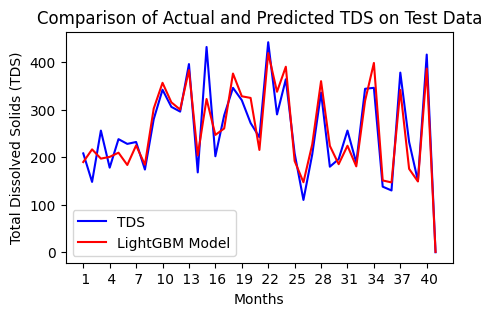

In [168]:
import matplotlib.pyplot as plt

# Generate month labels for x-axis
months = [f' {i+1}' for i in range(len(y_test))]

# Select only every third month for x-axis labels
xticks_interval = 3
xticks_positions = list(range(0, len(months), xticks_interval))
xticks_labels = [months[i] for i in xticks_positions]

# Plot Actual vs Predicted values
plt.figure(figsize=(5, 3))
plt.plot(months, y_test.reset_index(drop=True), label='TDS', color='b')
plt.plot(months, predictions, label='LightGBM Model', color='r')
plt.xlabel('Months')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS on Test Data')
plt.legend()
plt.xticks(ticks=xticks_positions, labels=xticks_labels,)  # Set ticks at intervals
plt.show()


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current v

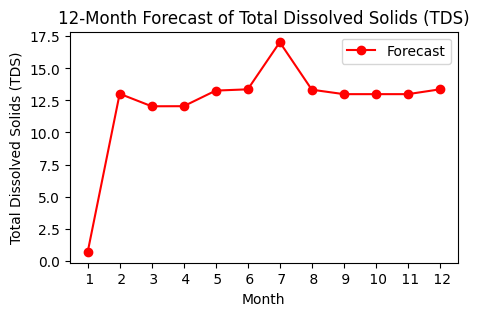

In [169]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# Assuming `model` is your trained XGBoost model and `future_X` contains features for forecasting

# Generate forecast for the next 12 months
future_X = X_test.tail(1).copy()
forecast = []
current_X = future_X.copy()

for _ in range(12):
    pred = lgbmr.predict(current_X)
    forecast.append(pred[0])
    # Update features for next month
    current_X.iloc[0, :] = current_X.iloc[0, :].shift(-1, fill_value=pred[0])

# Print forecast values
print("Forecast values for the next 12 months:", forecast)

# Plot the forecast
plt.figure(figsize=(5,3))
plt.plot(range(1, 13), forecast, marker='o', color='r', label='Forecast')
plt.xlabel('Month')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('12-Month Forecast of Total Dissolved Solids (TDS)')
plt.xticks(ticks=range(1, 13), labels=[f' {i}' for i in range(1, 13)])
plt.legend()
plt.show()


In [170]:
forecast

[np.float64(0.6547173543860332),
 np.float64(13.021370789945077),
 np.float64(12.044294843406043),
 np.float64(12.050988646018322),
 np.float64(13.268754923169682),
 np.float64(13.367054943411329),
 np.float64(17.043590015502584),
 np.float64(13.338972995742543),
 np.float64(12.991154460924935),
 np.float64(12.991154460924935),
 np.float64(12.991154460924935),
 np.float64(13.367054943411329)]

# **Catboost**

In [200]:
!pip install catboost

In [248]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd


# Train-test split
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.fillna(0)  # Handle any NaN values that may arise

y_train = y_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.fillna(0)  # Handle any NaN values that may arise

X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test = X_test.fillna(0)  # Handle any NaN values that may arise

y_test = y_test.apply(pd.to_numeric, errors='coerce')
y_test = y_test.fillna(0)  # Handle any NaN values that may arise

cbmodel = CatBoostRegressor(loss_function='RMSE')



# Clean the column names before fitting the model
X_train.columns = X_train.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True) # Replace special characters with underscores
X_test.columns = X_test.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True) # Replace special characters with underscores


# Fit the model with early stopping
cbmodel.fit(
    X_train, y_train,verbose=100
)

# Make predictions
y_pred = cbmodel.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")


Learning rate set to 0.029403
0:	learn: 87.3645844	total: 30.4ms	remaining: 30.4s
100:	learn: 32.1624130	total: 1.2s	remaining: 10.7s
200:	learn: 17.8594213	total: 2.03s	remaining: 8.08s
300:	learn: 10.8493978	total: 2.35s	remaining: 5.45s
400:	learn: 7.3274567	total: 2.54s	remaining: 3.79s
500:	learn: 4.6488269	total: 2.73s	remaining: 2.72s
600:	learn: 2.8229752	total: 2.92s	remaining: 1.94s
700:	learn: 1.7347405	total: 3.12s	remaining: 1.33s
800:	learn: 1.0273890	total: 3.34s	remaining: 830ms
900:	learn: 0.6372872	total: 3.55s	remaining: 390ms
999:	learn: 0.4109634	total: 3.74s	remaining: 0us
MSE: 1077.02
RMSE: 32.82
MAE: 27.26
R^2 Score: 0.88


Feature selection

In [249]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)

In [250]:
X_test.columns

Index(['Ammonia_N', 'BOD', 'Conductivity', 'Dissolved_O2_DO_',
       'Fecal_Coliform', 'Fecal_Streptococci', 'Nitrate_N', 'pH',
       'Temperature_Water_', 'Boron', 'Calcium', 'Chloride', 'COD', 'Fluoride',
       'Magnesium', 'Phenolpthalein_Alkanity', 'Phosphate_P', 'Potassium',
       'Sodium', 'Total_Fixed_Solids_TFS_', 'Total_Kjeldahl_Nitrogen_TKN_',
       'Total_Suspended_Solids_TSS_', 'Arsenic', 'Cadmium', 'Chromium_Total',
       'Copper', 'Mercury', 'Zinc', 'a_Endosulphan', 'Aldrin', 'Anilophos',
       'b_Endosulphan', 'Chlorpyriphos', 'Dieldrin', 'g_BHC', 'Malathion',
       'o_p_DDT', 'p_p_DDT', 'Sulphate', 'Lead', 'Methyl_Parathion'],
      dtype='object')

In [251]:
cbmodel.fit(X_train,y_train)

Learning rate set to 0.029403
0:	learn: 87.2880198	total: 2.19ms	remaining: 2.19s
1:	learn: 86.2893712	total: 3.85ms	remaining: 1.92s
2:	learn: 85.0177032	total: 5.45ms	remaining: 1.81s
3:	learn: 83.7668470	total: 6.99ms	remaining: 1.74s
4:	learn: 82.6520553	total: 8.49ms	remaining: 1.69s
5:	learn: 81.5258541	total: 9.96ms	remaining: 1.65s
6:	learn: 80.3615359	total: 11.4ms	remaining: 1.62s
7:	learn: 79.4625730	total: 12.9ms	remaining: 1.59s
8:	learn: 78.6325103	total: 14.4ms	remaining: 1.59s
9:	learn: 77.5724208	total: 15.9ms	remaining: 1.57s
10:	learn: 76.6384767	total: 17.4ms	remaining: 1.57s
11:	learn: 75.4179084	total: 18.4ms	remaining: 1.52s
12:	learn: 74.2875969	total: 19.8ms	remaining: 1.5s
13:	learn: 73.3380154	total: 21.4ms	remaining: 1.5s
14:	learn: 72.5354407	total: 22.9ms	remaining: 1.5s
15:	learn: 71.6812186	total: 24.4ms	remaining: 1.5s
16:	learn: 70.6667794	total: 25.8ms	remaining: 1.49s
17:	learn: 69.9794588	total: 27.4ms	remaining: 1.5s
18:	learn: 69.0017263	total: 29

**Train performance**

In [252]:
pred_train=cbmodel.predict(X_train)

In [253]:
print(r2_score(y_train,pred_train))

0.9999638696518728


In [254]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_train, pred_train)
r2 = r2_score(y_train, pred_train)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)

MSE: 0.2837117281507879
RMSE: 0.5326459688674907
MAPE: 70771964842900.81
R^2: 0.9999638696518728


In [255]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Ensure y_train is a numpy array if it's a pandas Series
y_train_values = y_train.values  # Convert to numpy array if y_train is a pandas Series

# Filter out zero values from y_train and corresponding pred_train
non_zero_indices_train = y_train_values != 0
y_train_non_zero = y_train_values[non_zero_indices_train]
pred_train_non_zero = pred_train[non_zero_indices_train]

# Calculate MAPE without zero values
if len(y_train_non_zero) == len(pred_train_non_zero):
    mape_train = np.mean(np.abs((y_train_non_zero - pred_train_non_zero) / y_train_non_zero)) * 100
    print(f"MAPE (excluding zeros) for training data: {mape_train}%")
else:
    print("Error: y_train and pred_train must be of the same length after filtering.")

# Or use sklearn's built-in MAPE function
mape_train_sklearn = mean_absolute_percentage_error(y_train_non_zero, pred_train_non_zero) * 100
print(f"MAPE (excluding zeros) for training data using sklearn: {mape_train_sklearn}%")

MAPE (excluding zeros) for training data: 0.19025514082481434%
MAPE (excluding zeros) for training data using sklearn: 0.19025514082481434%


In [256]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape_train],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))

+---------+----------+----------+----------+----------+
|         |      MSE |     RMSE |     MAPE |      R^2 |
+=========+==========+==========+==========+==========+
| Metrics | 0.283712 | 0.532646 | 0.190255 | 0.999964 |
+---------+----------+----------+----------+----------+


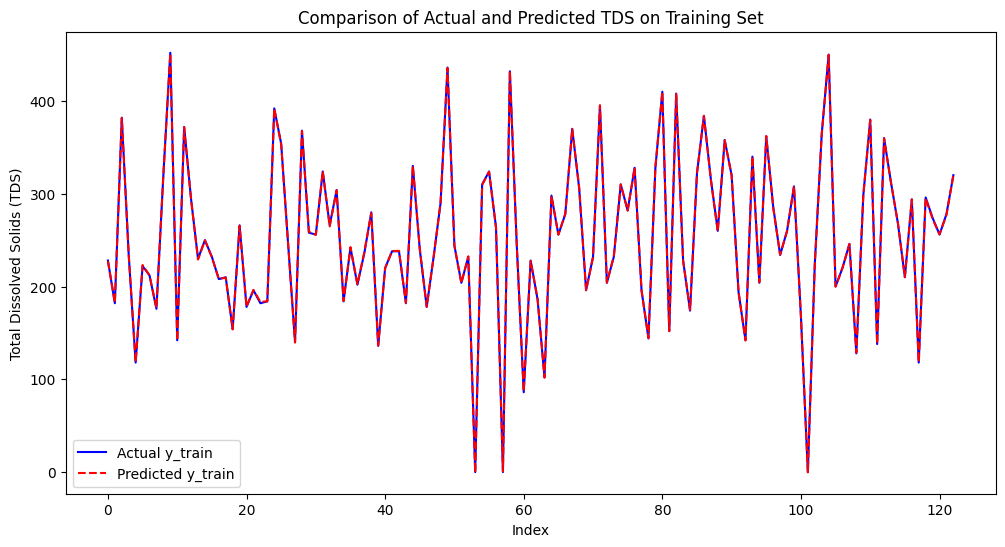

In [257]:
import matplotlib.pyplot as plt

# Plot y_train and pred_train
plt.figure(figsize=(12, 6))
plt.plot(y_train.reset_index(drop=True), label='Actual y_train', color='b')
plt.plot(pred_train, label='Predicted y_train', color='r', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Total Dissolved Solids (TDS)')
plt.title('Comparison of Actual and Predicted TDS on Training Set')
plt.legend()
plt.show()


**Test performance**

In [258]:
predictions = cbmodel.predict(X_test)
cb_pred = predictions

In [259]:
#y_test.loc['2019-11-15'] = y_test.median()

In [260]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test and predictions are defined
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R^2:", r2)

MSE: 1177.3273877101465
RMSE: 34.312204646599824
MAPE: 868924322901444.8
R^2: 0.8705275192609943


In [261]:
# Filter out zero values from y_test and corresponding predictions
non_zero_indices = y_test_values != 0
y_test_non_zero = y_test_values[non_zero_indices]
predictions_non_zero = predictions[non_zero_indices]

# Calculate MAPE without zero values
if len(y_test_non_zero) == len(predictions_non_zero):
    mape = np.mean(np.abs((y_test_non_zero - predictions_non_zero) / y_test_non_zero)) * 100
    print(f"MAPE (excluding zeros): {mape}%")
else:
    print("Error: y_test and predictions must be of the same length after filtering.")

mean_absolute_percentage_error(y_test_non_zero, predictions_non_zero)

MAPE (excluding zeros): 12.025453423222269%


0.12025453423222268

In [262]:
import pandas as pd
from tabulate import tabulate
# Define the metrics
metrics = {
    "MSE": [mse],
    "RMSE": [rmse],
    "MAPE": [mape],
    "R^2": [r2]
}

# Create the DataFrame
metrics_df = pd.DataFrame(metrics, index=["Metrics"])

# Display the DataFrame with grid lines
print(tabulate(metrics_df, headers="keys", tablefmt="grid"))


+---------+---------+---------+---------+----------+
|         |     MSE |    RMSE |    MAPE |      R^2 |
+=========+=========+=========+=========+==========+
| Metrics | 1177.33 | 34.3122 | 12.0255 | 0.870528 |
+---------+---------+---------+---------+----------+


In [263]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate Relative RMSE
mean_actual = y_test.mean()
relative_rmse = rmse / mean_actual

# Calculate Normalized RMSE
range_actual = y_test.max() - y_test.min()
normalized_rmse = rmse / range_actual

# Display the results
results = {
    'Metric': ['RMSE', 'Relative RMSE', 'Normalized RMSE'],
    'Value': [rmse, relative_rmse, normalized_rmse]
}

results_df = pd.DataFrame(results)
print(results_df)

            Metric      Value
0             RMSE  34.312205
1    Relative RMSE   0.134468
2  Normalized RMSE   0.077629


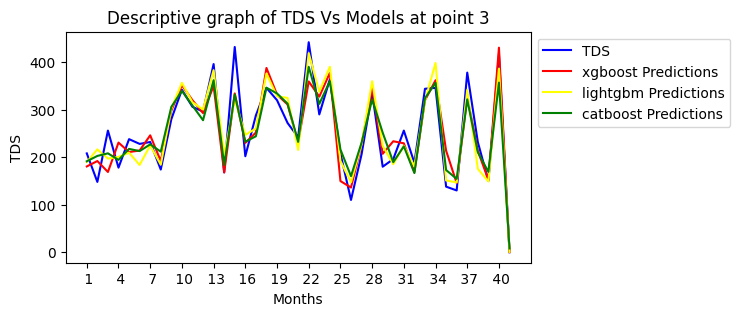

In [264]:
import matplotlib.pyplot as plt

# Generate month labels for x-axis
months = [f' {i+1}' for i in range(len(y_test))]

# Select only every third month for x-axis labels
xticks_interval = 3
xticks_positions = list(range(0, len(months), xticks_interval))
xticks_labels = [months[i] for i in xticks_positions]

# Plot Actual vs Predicted values
plt.figure(figsize=(6, 3))
plt.plot(months, y_test.reset_index(drop=True), label='TDS', color='b')
plt.plot(months, xgb_pred, label='xgboost Predictions', color='red')
plt.plot(months, lgb_pred, label='lightgbm Predictions', color='yellow')
plt.plot(months, cb_pred, label='catboost Predictions', color='green')
plt.xlabel('Months')
plt.ylabel('TDS')
plt.title('Descriptive graph of TDS Vs Models at point 3')
plt.xticks(ticks=xticks_positions, labels=xticks_labels,)  # Set ticks at intervals
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Forecast values for the next 12 months: [np.float64(7.910538277524466), np.float64(139.8805541664097), np.float64(142.48213041073217), np.float64(134.4021453901372), np.float64(129.6687144761301), np.float64(104.59729609140336), np.float64(146.270662746), np.float64(145.12136563224647), np.float64(123.8277463349126), np.float64(148.59692153061016), np.float64(148.59692153061016), np.float64(148.59692153061016)]


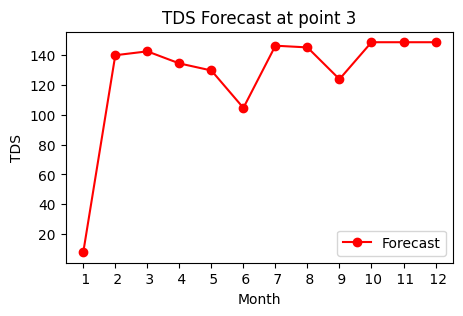

In [265]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# Assuming `model` is your trained XGBoost model and `future_X` contains features for forecasting

# Generate forecast for the next 12 months
future_X = X_test.tail(1).copy()
forecast = []
current_X = future_X.copy()

for _ in range(12):
    pred = cbmodel.predict(current_X)
    forecast.append(pred[0])
    # Update features for next month
    current_X.iloc[0, :] = current_X.iloc[0, :].shift(-1, fill_value=pred[0])

# Print forecast values
print("Forecast values for the next 12 months:", forecast)

# Plot the forecast
plt.figure(figsize=(5,3))
plt.plot(range(1, 13), forecast, marker='o', color='r', label='Forecast')
plt.xlabel('Month')
plt.ylabel('TDS')
plt.title('TDS Forecast at point 3')
plt.xticks(ticks=range(1, 13), labels=[f' {i}' for i in range(1, 13)])
plt.legend()
plt.show()

In [266]:
db


Total Dissolved Solids(TDS)
Date                                   
2024-07-10                        228.0
2024-08-12                        230.0
2024-09-10                        163.0
2024-10-24                        163.0
2024-11-12                        220.0
2024-12-09                        232.0
2025-01-09                        178.0
2025-02-05                        222.0
2025-03-05                        248.0
2025-04-09                        271.0
2025-05-05                        212.0
2025-06-02                        220.0

In [267]:
backtest

Date
2024-07-10    228.0
2024-08-12    230.0
2024-09-10    163.0
2024-10-24    163.0
2024-11-12    220.0
2024-12-09    232.0
2025-01-09    178.0
2025-02-05    222.0
2025-03-05    248.0
2025-04-09    271.0
2025-05-05    212.0
2025-06-02    220.0
Name: Total Dissolved Solids(TDS), dtype: float64

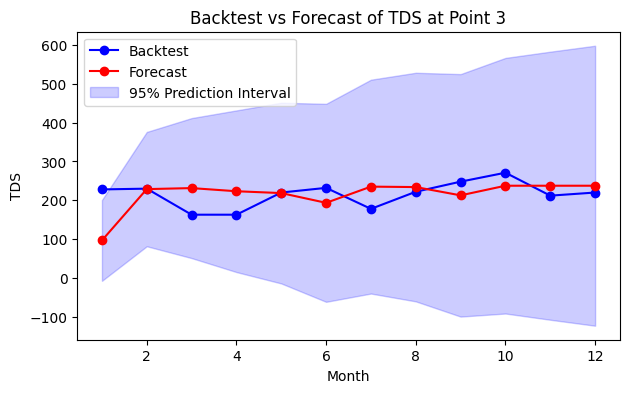

In [268]:
import matplotlib.pyplot as plt
import numpy as np

# Backtest (last 5 actual values)
backtest = db['Total Dissolved Solids(TDS)']

# Forecast (raw from your model)
forecast = np.array(forecast)

# ----- Bias correction (mean only, keeps variation) -----
bias = np.mean(forecast[:len(backtest)] - backtest)
forecast_corrected = forecast - bias   # shift only

# ----- Funnel-shaped Prediction Interval -----
horizon = len(forecast_corrected)
time = np.arange(1, horizon+1)

# Base error from backtest residuals
residuals = forecast[:len(backtest)] - backtest
base_error = np.std(residuals)

# Funnel: error grows with sqrt(time)
std_error = base_error * np.sqrt(time)

upper = forecast_corrected + 1.96 * std_error
lower = forecast_corrected - 1.96 * std_error

# ----- Plot -----
plt.figure(figsize=(7,4))

# Backtest
plt.plot(range(1, len(backtest)+1), backtest, marker='o', color='blue', label="Backtest")

# Forecast (keeps fluctuations)
plt.plot(time, forecast_corrected, marker='o', color='red', label="Forecast")

# Shaded funnel-shaped 95% Prediction Interval
plt.fill_between(time, lower, upper, color="blue", alpha=0.2, label="95% Prediction Interval")

plt.xlabel("Month")
plt.ylabel("TDS")
plt.title("Backtest vs Forecast of TDS at Point 3")
plt.legend()
plt.show()


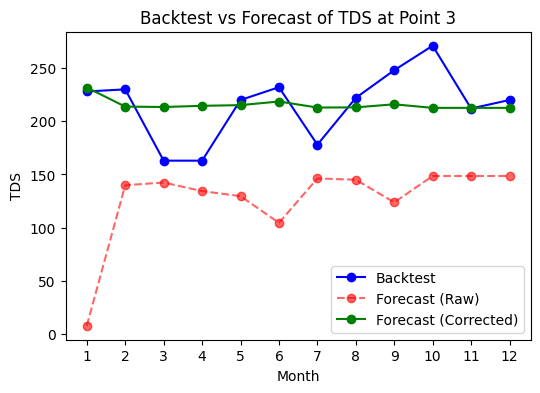

In [269]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Backtest data (last 5 points from db)
backtest = db['Total Dissolved Solids(TDS)']

# Forecast data (12 points)
forecast = []
future_X = X_test.tail(1).copy()
current_X = future_X.copy()

for _ in range(12):
    pred = cbmodel.predict(current_X)
    forecast.append(pred[0])
    # Update features for next step
    current_X.iloc[0, :] = current_X.iloc[0, :].shift(-1, fill_value=pred[0])

forecast = np.array(forecast)

# ----- Linear bias correction -----
overlap_len = len(backtest)
reg = LinearRegression().fit(forecast[:overlap_len].reshape(-1, 1), backtest)
forecast_corrected = reg.predict(forecast.reshape(-1, 1))

# ----- Plot -----
plt.figure(figsize=(6,4))

# Backtest (blue line, 5 points)
plt.plot(range(1, len(backtest)+1), backtest, marker='o', color='blue', label='Backtest')

# Forecast raw (red dashed)
plt.plot(range(1, len(forecast)+1), forecast, marker='o', linestyle="--", color='red', alpha=0.6, label='Forecast (Raw)')

# Forecast corrected (green solid)
plt.plot(range(1, len(forecast_corrected)+1), forecast_corrected, marker='o', color='green', label='Forecast (Corrected)')

plt.xlabel('Month')
plt.ylabel('TDS')
plt.title('Backtest vs Forecast of TDS at Point 3')
plt.xticks(range(1, max(len(backtest), len(forecast))+1))  # months 1...12
plt.legend()
plt.show()
